<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичное-рассмотрение-данных" data-toc-modified-id="Первичное-рассмотрение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичное рассмотрение данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-ненужных-признаков" data-toc-modified-id="Удаление-ненужных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление ненужных признаков</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Анализ-датасета" data-toc-modified-id="Анализ-датасета-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ датасета</a></span></li><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Итоги-обучения" data-toc-modified-id="Итоги-обучения-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Итоги обучения</a></span></li></ul></li><li><span><a href="#Тестовая-проверка" data-toc-modified-id="Тестовая-проверка-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестовая проверка</a></span></li></ul></div>

# Оценка стоимости объектов жилой недвижимости

## Первичное рассмотрение данных

### Импорт библиотек и загрузка данных

Изначально импортируем необходимые библиотеки

In [1]:
!pip install ydata_profiling

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler)
from catboost import CatBoostRegressor
from catboost import Pool, cv
import shap
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from ydata_profiling import ProfileReport

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Введем данный нам датасет и рассмотрим его.

In [3]:
data = pd.read_csv('D:/Data_Science/datasets/spb_flats_no_apt_2023_04_cap_40m_usr.csv')

In [4]:
data.head()

,Unnamed: 0,id,roomsCount,flatType,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,cargoLiftsCount,parkingType,buildYear,buildingMaterial,saleType,price
0,0,268866495,1.0,rooms,39.2,17.0,9.0,0.0,4,17,19,1.0,1.0,ground,2019.0,panel,free,8000
1,1,268791775,1.0,rooms,46.7,18.7,10.6,0.0,4,1,10,1.0,0.0,NaN,2001.0,panel,free,8200
2,2,268297577,NaN,studio,31.5,NaN,NaN,0.0,4,3,15,1.0,1.0,ground,2020.0,monolithBrick,free,5850
3,3,267975109,NaN,studio,14.0,NaN,NaN,NaN,4,1,6,2.0,NaN,NaN,1901.0,brick,free,3799
4,4,267680605,2.0,rooms,46.4,31.2,NaN,1.0,4,5,5,0.0,0.0,NaN,1964.0,panel,free,6700


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37851 entries, 0 to 37850
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           37851 non-null  int64  
 1   id                   37851 non-null  int64  
 2   roomsCount           33450 non-null  float64
 3   flatType             37851 non-null  object 
 4   totalArea            37851 non-null  float64
 5   livingArea           35024 non-null  float64
 6   kitchenArea          34438 non-null  float64
 7   balconiesCount       23421 non-null  float64
 8   interior             37851 non-null  int64  
 9   floorNumber          37851 non-null  int64  
 10  floorsCount          37851 non-null  int64  
 11  passengerLiftsCount  27075 non-null  float64
 12  cargoLiftsCount      18911 non-null  float64
 13  parkingType          11750 non-null  object 
 14  buildYear            32547 non-null  float64
 15  buildingMaterial     30295 non-null 

In [6]:
#profile = ProfileReport(data, title="Profiling Report")
#profile

## Предобработка данных

### Удаление ненужных признаков

Изначально избавимся от ненужных столбцов id

In [7]:
data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [8]:
data

,roomsCount,flatType,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,cargoLiftsCount,parkingType,buildYear,buildingMaterial,saleType,price
0,1.0,rooms,39.2,17.0,9.0,0.0,4,17,19,1.0,1.0,ground,2019.0,panel,free,8000
1,1.0,rooms,46.7,18.7,10.6,0.0,4,1,10,1.0,0.0,NaN,2001.0,panel,free,8200
2,NaN,studio,31.5,NaN,NaN,0.0,4,3,15,1.0,1.0,ground,2020.0,monolithBrick,free,5850
3,NaN,studio,14.0,NaN,NaN,NaN,4,1,6,2.0,NaN,NaN,1901.0,brick,free,3799
4,2.0,rooms,46.4,31.2,NaN,1.0,4,5,5,0.0,0.0,NaN,1964.0,panel,free,6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37846,2.0,rooms,43.9,28.0,6.0,0.0,4,1,5,0.0,0.0,ground,1960.0,brick,free,6690
37847,1.0,rooms,42.4,15.4,12.7,NaN,4,1,25,2.0,NaN,NaN,2017.0,monolith,free,6400
37848,NaN,studio,24.0,16.0,3.0,1.0,4,1,17,1.0,1.0,NaN,2016.0,NaN,free,5200
37849,NaN,studio,22.0,NaN,NaN,NaN,4,2,4,NaN,NaN,NaN,1916.0,brick,free,4840


### Заполнение пропусков


Рассмотрим вопрос пропусков

In [9]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

this method is deprecated in favour of `Styler.format(precision=..)`


,0
roomsCount,11.6
flatType,0.0
totalArea,0.0
livingArea,7.5
kitchenArea,9.0
balconiesCount,38.1
interior,0.0
floorNumber,0.0
floorsCount,0.0
passengerLiftsCount,28.5


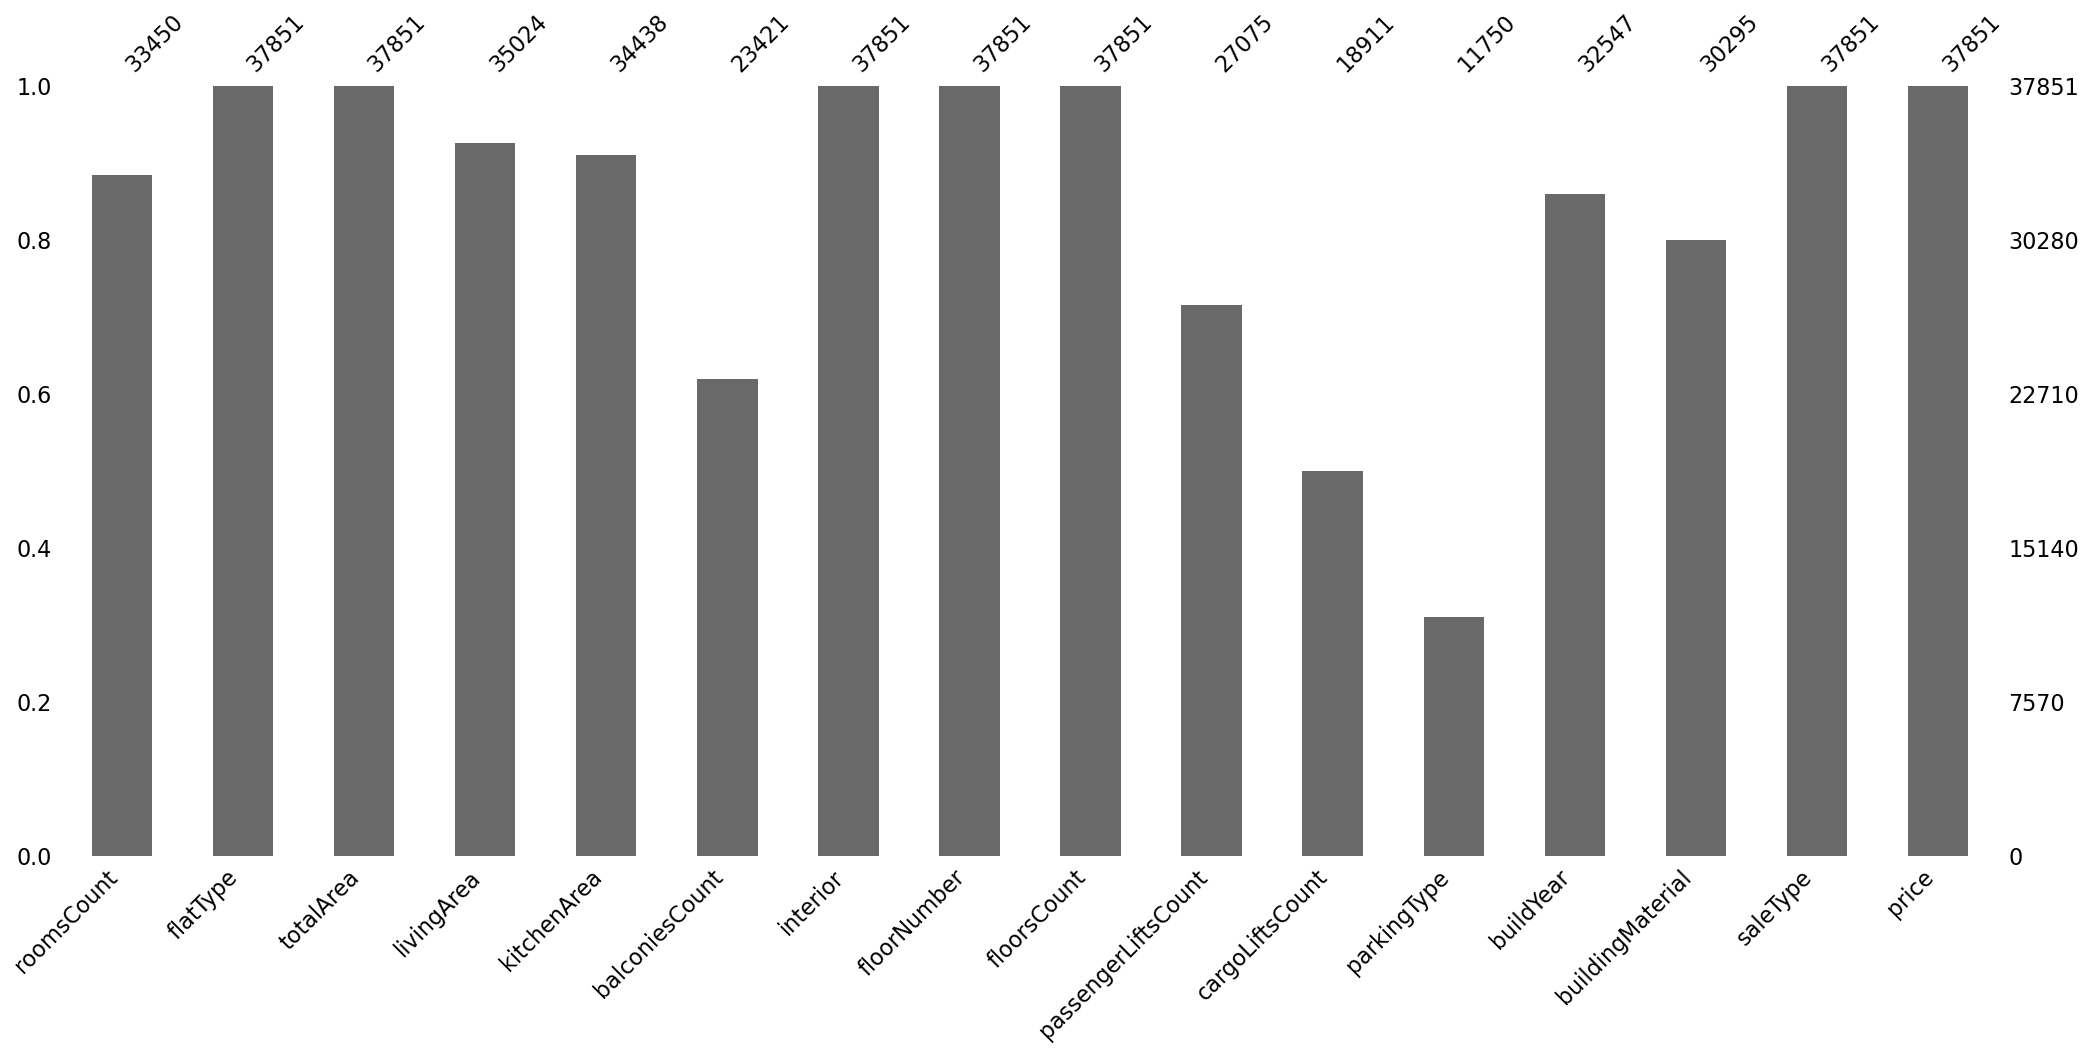

In [10]:
msno.bar(data);

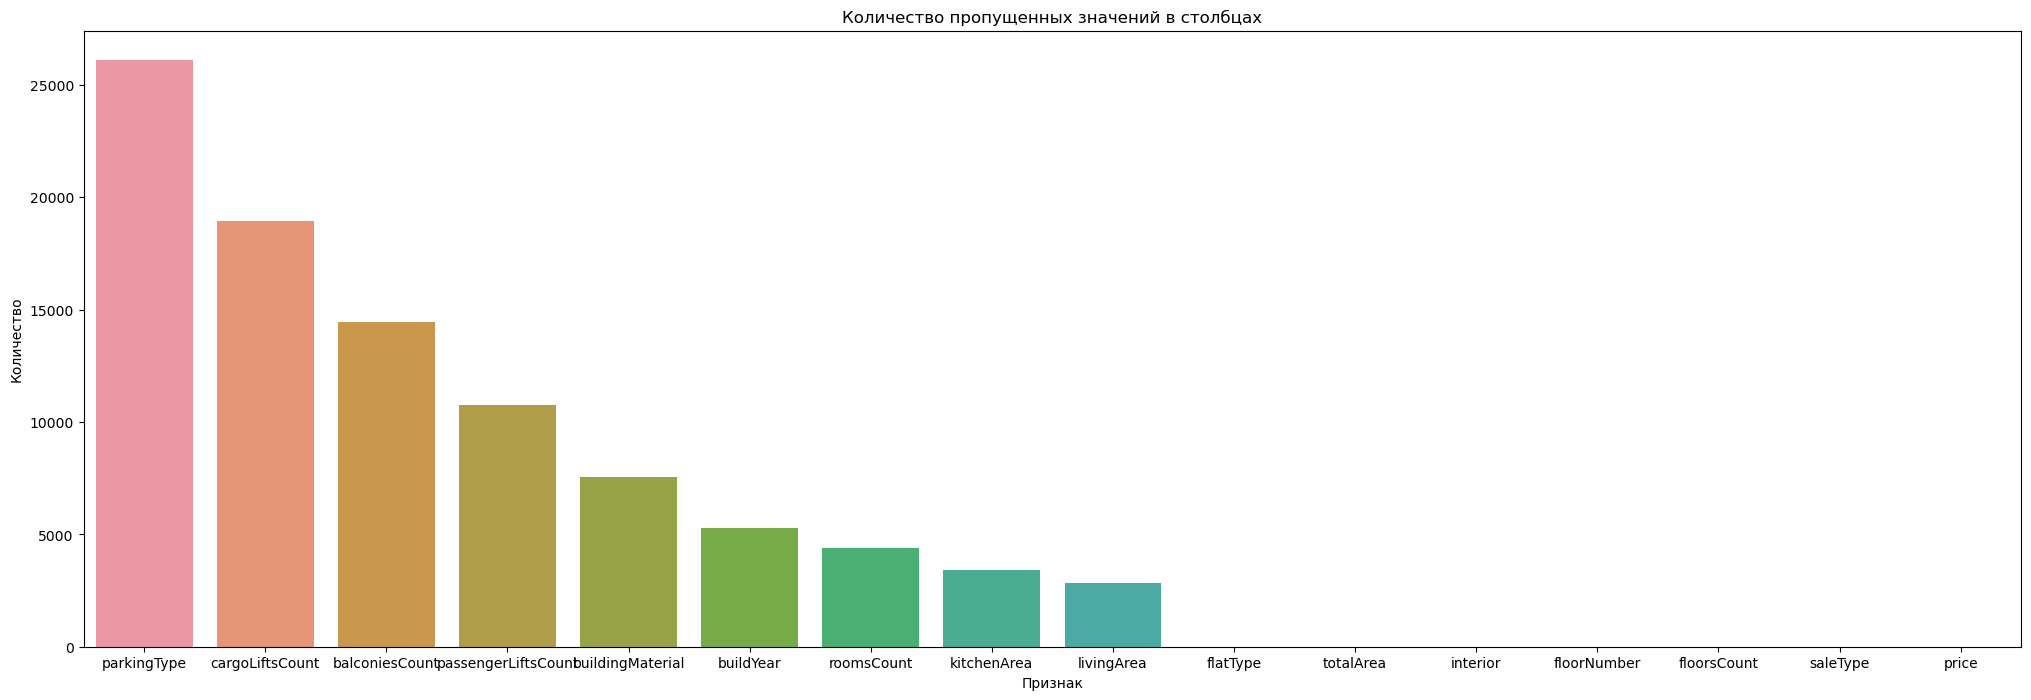

In [11]:
plt.figure(figsize=(25,8))
plt.title('Количество пропущенных значений в столбцах')
missing_count = pd.DataFrame(data.isnull().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(20).reset_index()
missing_count.columns = ['Признак', 'Количество']
sns.barplot(x='Признак', y='Количество', data=missing_count);

В первую очередь необходимо избавиться от признаков, в которых 50% или более значений являются пропущенными. 

In [12]:
data.drop(['parkingType', 'cargoLiftsCount'], axis=1, inplace=True)

In [13]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

this method is deprecated in favour of `Styler.format(precision=..)`


,0
roomsCount,11.6
flatType,0.0
totalArea,0.0
livingArea,7.5
kitchenArea,9.0
balconiesCount,38.1
interior,0.0
floorNumber,0.0
floorsCount,0.0
passengerLiftsCount,28.5


Заполнение пропусков в столбце buildingMaterial произведем в соответствии с внутригрупповым значением по столбцу floorsCount, так как количество этажей в доме напрямую взаимосвязано с материалом дома.

In [14]:
data['buildingMaterial'].value_counts()

brick             9704
panel             7585
monolith          6529
monolithBrick     5186
block              601
old                396
stalin             280
aerocreteBlock       6
wood                 6
wireframe            2
Name: buildingMaterial, dtype: int64

In [15]:
for floor in data['floorsCount'].unique():
        data.loc[(data['floorsCount'] == floor) & (data['buildingMaterial'].isna()), 'buildingMaterial'] = \
        (data.loc[(data['floorsCount'] == floor), 'buildingMaterial'].mode()).to_string(index=False)

In [16]:
data['buildingMaterial'].value_counts()

brick             12552
panel              9384
monolith           9234
monolithBrick      5388
block               601
old                 396
stalin              280
aerocreteBlock        6
wood                  6
Series([], )          2
wireframe             2
Name: buildingMaterial, dtype: int64

In [17]:
data.drop(data[data['buildingMaterial'] == 'Series([], )'].index, inplace=True)

То же самое сделаем в отношении признака passengerLiftsCount

In [18]:
data['passengerLiftsCount'].value_counts()

1.0    15491
2.0     5047
0.0     4906
3.0     1326
4.0      302
5.0        1
8.0        1
Name: passengerLiftsCount, dtype: int64

In [19]:
for floor in data['floorsCount'].unique():
        data.loc[(data['floorsCount'] == floor) & (data['passengerLiftsCount'].isna()), 'passengerLiftsCount'] = \
        (data.loc[(data['floorsCount'] == floor), 'passengerLiftsCount'].median())

In [20]:
data['passengerLiftsCount'].value_counts()

1.0    19579
0.0    10517
2.0     6118
3.0     1329
4.0      302
2.5        2
5.0        1
8.0        1
Name: passengerLiftsCount, dtype: int64

In [21]:
data.loc[data['passengerLiftsCount'] == 2.5] = 3

In [22]:
data['buildingMaterial'].value_counts()

brick             12552
panel              9384
monolith           9233
monolithBrick      5387
block               601
old                 396
stalin              280
aerocreteBlock        6
wood                  6
3                     2
wireframe             2
Name: buildingMaterial, dtype: int64

In [23]:
data.drop(data[data['buildingMaterial'] == '3'].index, inplace=True)
data.drop(data[data['buildingMaterial'] == '2'].index, inplace=True)

In [24]:
data['buildingMaterial'].value_counts()

brick             12552
panel              9384
monolith           9233
monolithBrick      5387
block               601
old                 396
stalin              280
aerocreteBlock        6
wood                  6
3                     2
wireframe             2
Name: buildingMaterial, dtype: int64

Пропуски в столбце balconiesCount заполним в зависимости от непосредственного номера этажа

In [25]:
data['balconiesCount'].value_counts()

1.0    12465
0.0    10256
2.0      623
3.0       58
4.0       19
Name: balconiesCount, dtype: int64

In [26]:
for floor in data['floorNumber'].unique():
        data.loc[(data['floorNumber'] == floor) & (data['balconiesCount'].isna()), 'balconiesCount'] = \
        (data.loc[(data['floorNumber'] == floor), 'balconiesCount'].median())

In [27]:
data['balconiesCount'].value_counts()

1.0    22906
0.0    14243
2.0      623
3.0       58
4.0       19
Name: balconiesCount, dtype: int64

Пропуски в отдельных значениях площади и количестве комнат заполним в соответствии с общим показателем площади

In [28]:
areas = ['livingArea', 'kitchenArea', 'roomsCount']

In [29]:
for area in data['totalArea'].unique():
    for area_1 in areas:
        data.loc[(data['totalArea'] == area) & (data[area_1].isna()), area_1] = \
        (data.loc[(data['totalArea'] == area), area_1].median())

In [30]:
data['roomsCount'].value_counts()

1.0    14548
2.0    11495
3.0     8403
4.0     1640
5.0      371
6.0      238
1.5       25
Name: roomsCount, dtype: int64

In [31]:
data.loc[data['roomsCount'] == 1.5] = 2

In [32]:
data['roomsCount'].value_counts()

1.0    14548
2.0    11520
3.0     8403
4.0     1640
5.0      371
6.0      238
Name: roomsCount, dtype: int64

In [33]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

this method is deprecated in favour of `Styler.format(precision=..)`


,0
roomsCount,3.0
flatType,0.0
totalArea,0.0
livingArea,0.3
kitchenArea,0.6
balconiesCount,0.0
interior,0.0
floorNumber,0.0
floorsCount,0.0
passengerLiftsCount,0.0


Отдельные оставшиеся пропуски заполним значениями моды и медианы

In [34]:
data['roomsCount'].fillna(data['roomsCount'].mode()[0], inplace=True)

In [35]:
data['livingArea'].fillna(data['livingArea'].median(), inplace=True)

In [36]:
data['kitchenArea'].fillna(data['kitchenArea'].median(), inplace=True)

Признак buildYear заполним так же в соответствии с количеством этажей

In [37]:
for floor in data['floorsCount'].unique():
        data.loc[(data['floorsCount'] == floor) & (data['buildYear'].isna()), 'buildYear'] = \
        (data.loc[(data['floorsCount'] == floor), 'buildYear'].median())

In [38]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

this method is deprecated in favour of `Styler.format(precision=..)`


,0
roomsCount,0.0
flatType,0.0
totalArea,0.0
livingArea,0.0
kitchenArea,0.0
balconiesCount,0.0
interior,0.0
floorNumber,0.0
floorsCount,0.0
passengerLiftsCount,0.0


Таким образом, пропуски устранены

Также приведем признаки к правильным типам данных

In [39]:
data

,roomsCount,flatType,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,buildingMaterial,saleType,price
0,1.0,rooms,39.2,17.0,9.00,0.0,4,17,19,1.0,2019.0,panel,free,8000
1,1.0,rooms,46.7,18.7,10.60,0.0,4,1,10,1.0,2001.0,panel,free,8200
2,1.0,studio,31.5,17.0,6.00,0.0,4,3,15,1.0,2020.0,monolithBrick,free,5850
3,1.0,studio,14.0,9.5,2.00,0.0,4,1,6,2.0,1901.0,brick,free,3799
4,2.0,rooms,46.4,31.2,8.15,1.0,4,5,5,0.0,1964.0,panel,free,6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37846,2.0,rooms,43.9,28.0,6.00,0.0,4,1,5,0.0,1960.0,brick,free,6690
37847,1.0,rooms,42.4,15.4,12.70,0.0,4,1,25,2.0,2017.0,monolith,free,6400
37848,1.0,studio,24.0,16.0,3.00,1.0,4,1,17,1.0,2016.0,monolith,free,5200
37849,1.0,studio,22.0,15.0,5.00,0.0,4,2,4,0.0,1916.0,brick,free,4840


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37849 entries, 0 to 37850
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   roomsCount           37849 non-null  float64
 1   flatType             37849 non-null  object 
 2   totalArea            37849 non-null  float64
 3   livingArea           37849 non-null  float64
 4   kitchenArea          37849 non-null  float64
 5   balconiesCount       37849 non-null  float64
 6   interior             37849 non-null  int64  
 7   floorNumber          37849 non-null  int64  
 8   floorsCount          37849 non-null  int64  
 9   passengerLiftsCount  37849 non-null  float64
 10  buildYear            37849 non-null  float64
 11  buildingMaterial     37849 non-null  object 
 12  saleType             37849 non-null  object 
 13  price                37849 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 4.3+ MB


In [41]:
data['roomsCount'] = data['roomsCount'].astype('int')

In [42]:
data['balconiesCount'] = data['balconiesCount'].astype('int')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37849 entries, 0 to 37850
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   roomsCount           37849 non-null  int32  
 1   flatType             37849 non-null  object 
 2   totalArea            37849 non-null  float64
 3   livingArea           37849 non-null  float64
 4   kitchenArea          37849 non-null  float64
 5   balconiesCount       37849 non-null  int32  
 6   interior             37849 non-null  int64  
 7   floorNumber          37849 non-null  int64  
 8   floorsCount          37849 non-null  int64  
 9   passengerLiftsCount  37849 non-null  float64
 10  buildYear            37849 non-null  float64
 11  buildingMaterial     37849 non-null  object 
 12  saleType             37849 non-null  object 
 13  price                37849 non-null  int64  
dtypes: float64(5), int32(2), int64(4), object(3)
memory usage: 4.0+ MB


In [44]:
data

,roomsCount,flatType,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,buildingMaterial,saleType,price
0,1,rooms,39.2,17.0,9.00,0,4,17,19,1.0,2019.0,panel,free,8000
1,1,rooms,46.7,18.7,10.60,0,4,1,10,1.0,2001.0,panel,free,8200
2,1,studio,31.5,17.0,6.00,0,4,3,15,1.0,2020.0,monolithBrick,free,5850
3,1,studio,14.0,9.5,2.00,0,4,1,6,2.0,1901.0,brick,free,3799
4,2,rooms,46.4,31.2,8.15,1,4,5,5,0.0,1964.0,panel,free,6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37846,2,rooms,43.9,28.0,6.00,0,4,1,5,0.0,1960.0,brick,free,6690
37847,1,rooms,42.4,15.4,12.70,0,4,1,25,2.0,2017.0,monolith,free,6400
37848,1,studio,24.0,16.0,3.00,1,4,1,17,1.0,2016.0,monolith,free,5200
37849,1,studio,22.0,15.0,5.00,0,4,2,4,0.0,1916.0,brick,free,4840


In [45]:
data['flatType'].value_counts()

rooms     33447
studio     4375
2            25
3             2
Name: flatType, dtype: int64

In [46]:
data.drop(data[data['flatType'] == 2].index, inplace=True)
data.drop(data[data['flatType'] == 3].index, inplace=True)

## Анализ датасета

Рассмотрим корреляцию признаков

<AxesSubplot:>

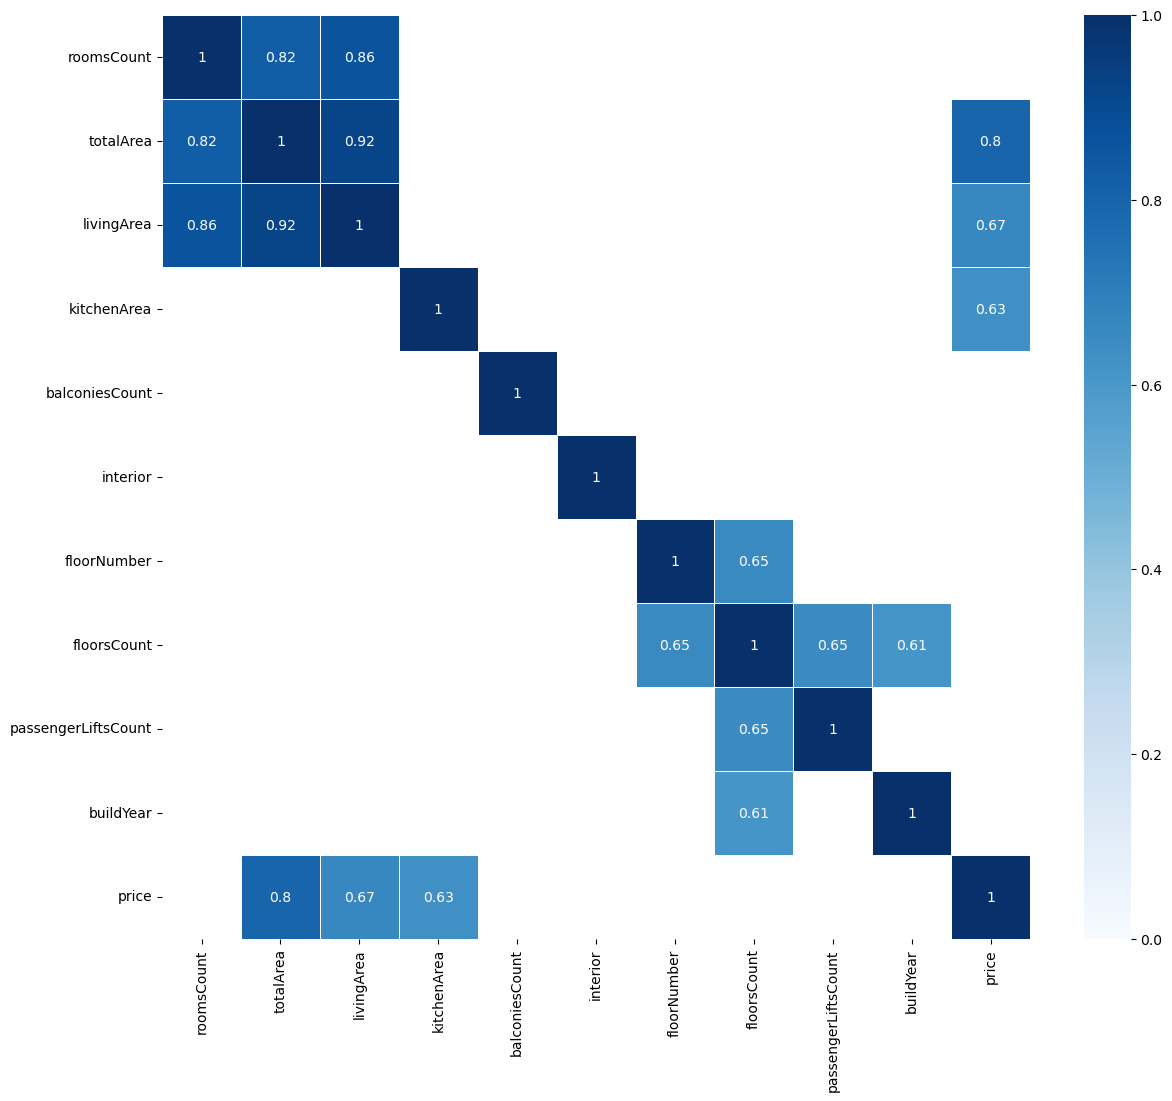

In [47]:
plt.figure(figsize=(14, 12))
corr = data.corr()
sns.heatmap(corr, mask = corr < 0.6, linewidth=0.5, cmap='Blues', annot=True, vmin=0, vmax=1)

Можем видеть, что цена в наибольшей степени связана с признаками площади. Возможно лишние признаки площади стоило бы удалить по причине мультиколлинеарности, но, по-моему мнению, у нас слишком мало признаков чтобы так их удалять.

Распределим признаки на количественные (непрерывные и дискретные) и категориальные

In [48]:
cat_cols = data.select_dtypes(include=['object']).columns 
cat_cols

Index(['flatType', 'buildingMaterial', 'saleType'], dtype='object')

In [49]:
num_cols = data.select_dtypes(exclude=['object']).columns 
num_cols

Index(['roomsCount', 'totalArea', 'livingArea', 'kitchenArea',
       'balconiesCount', 'interior', 'floorNumber', 'floorsCount',
       'passengerLiftsCount', 'buildYear', 'price'],
      dtype='object')

In [50]:
num_features = data.select_dtypes(exclude=['object']).copy()
cat_features = data.select_dtypes(include=['object']).copy()

In [51]:
num_features

,roomsCount,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,price
0,1,39.2,17.0,9.00,0,4,17,19,1.0,2019.0,8000
1,1,46.7,18.7,10.60,0,4,1,10,1.0,2001.0,8200
2,1,31.5,17.0,6.00,0,4,3,15,1.0,2020.0,5850
3,1,14.0,9.5,2.00,0,4,1,6,2.0,1901.0,3799
4,2,46.4,31.2,8.15,1,4,5,5,0.0,1964.0,6700
...,...,...,...,...,...,...,...,...,...,...,...
37846,2,43.9,28.0,6.00,0,4,1,5,0.0,1960.0,6690
37847,1,42.4,15.4,12.70,0,4,1,25,2.0,2017.0,6400
37848,1,24.0,16.0,3.00,1,4,1,17,1.0,2016.0,5200
37849,1,22.0,15.0,5.00,0,4,2,4,0.0,1916.0,4840


In [52]:
cat_features

,flatType,buildingMaterial,saleType
0,rooms,panel,free
1,rooms,panel,free
2,studio,monolithBrick,free
3,studio,brick,free
4,rooms,panel,free
...,...,...,...
37846,rooms,brick,free
37847,rooms,monolith,free
37848,studio,monolith,free
37849,studio,brick,free


In [53]:
disc_num_var = ['roomsCount', 'balconiesCount', 'interior', 'floorNumber', 'floorsCount', 'passengerLiftsCount', 'buildYear']

In [54]:
cont_num_var = []
for i in num_features.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)
        
cont_num_var

['totalArea', 'livingArea', 'kitchenArea', 'price']

Рассмотрим распределения непрерывных признаков

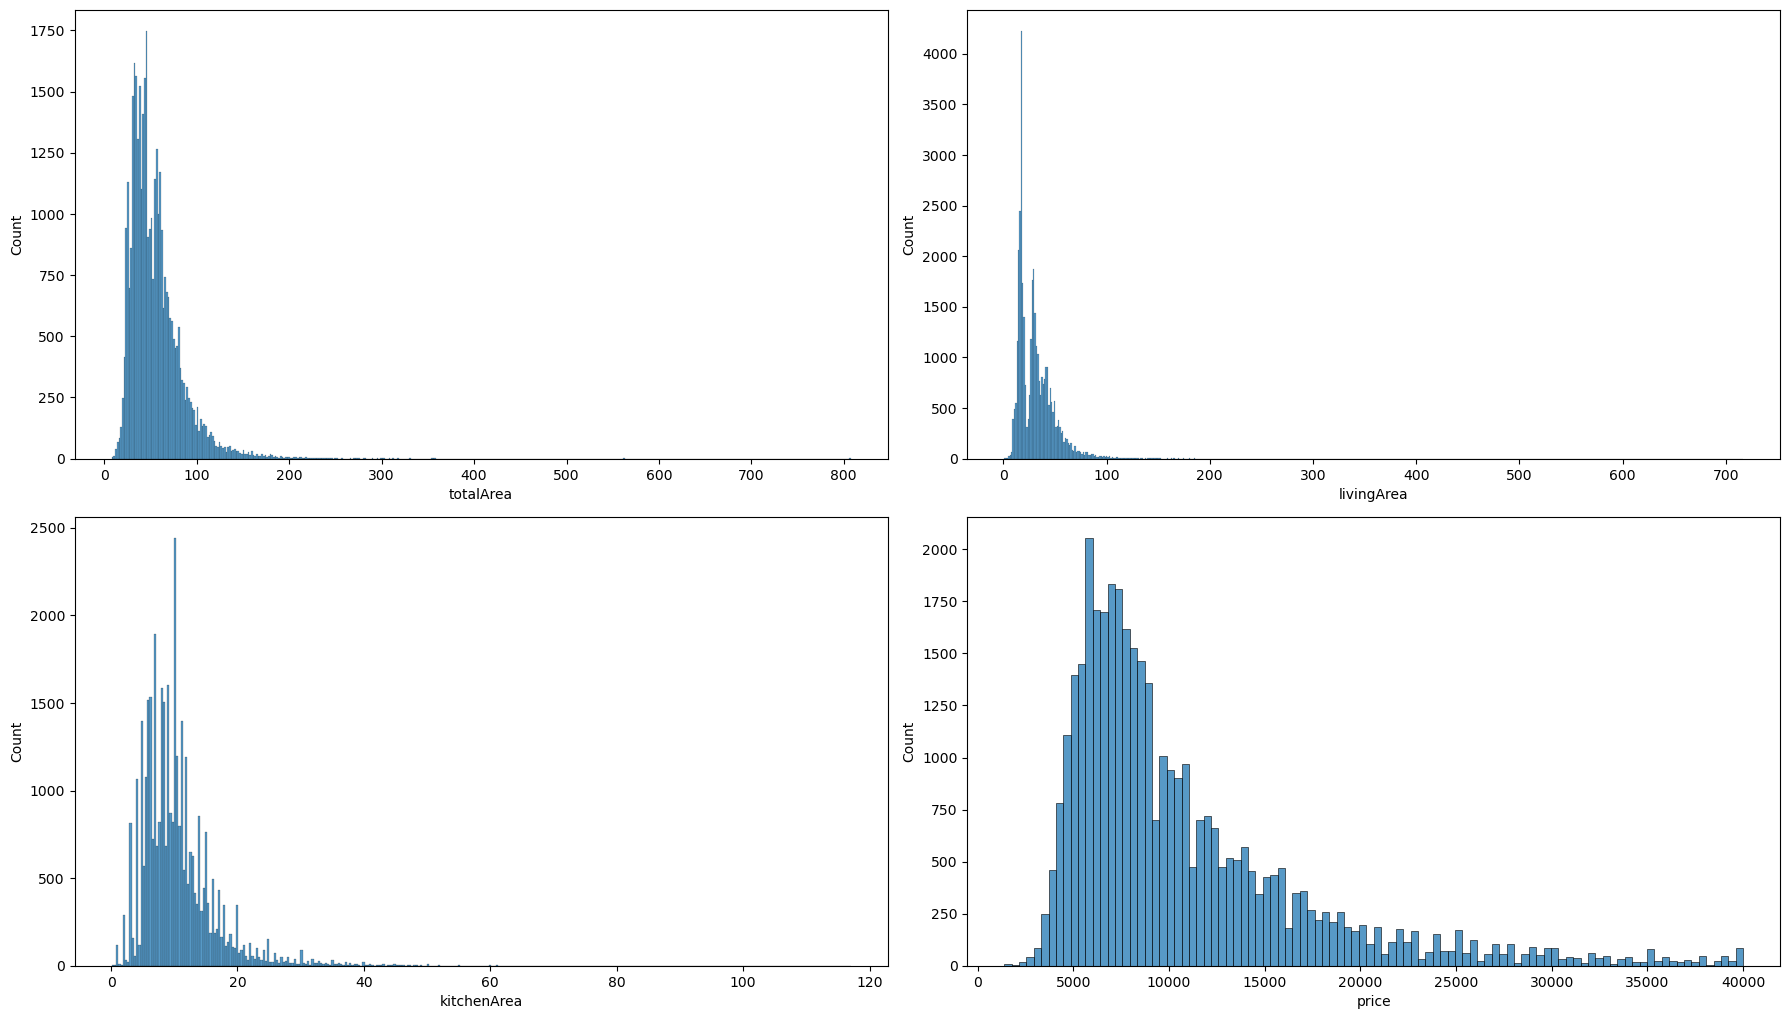

In [55]:
fig = plt.figure(figsize=(18, 20))
for index, col in enumerate(cont_num_var):
    plt.subplot(4, 2, index+1)
    sns.histplot(num_features.loc[:, col].dropna(), kde=False)
fig.tight_layout() # pad=1.0

Данные распределения схожи между собой, отличны от нормального и имеют "хвосты" влево.

Рассмотрим вопрос выбросов

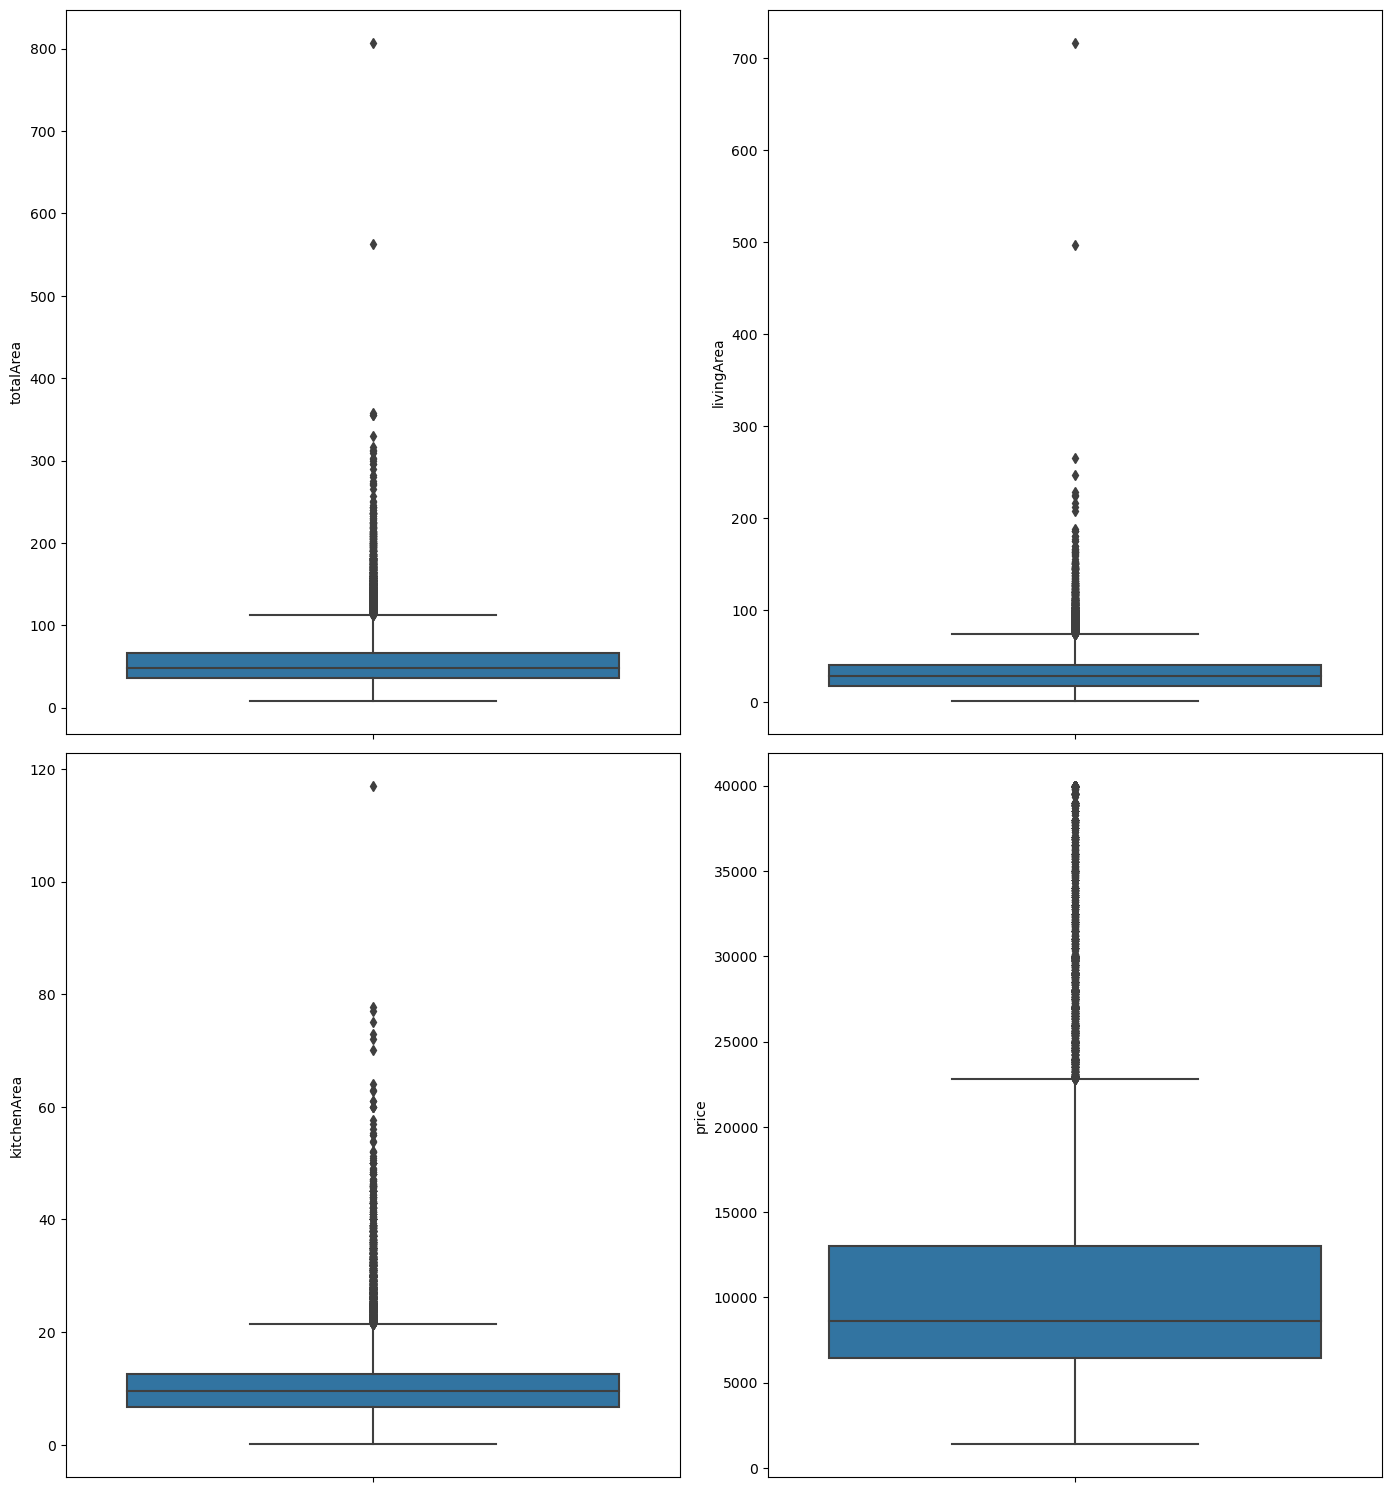

In [56]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(2, 2,index+1)
    sns.boxplot(y=col, data=num_features.dropna())
fig.tight_layout(pad=1.0)

Предусматривается пара отдельных выбросов в вопросе площади жилья

Рассмотрим распределение дискретных признаков

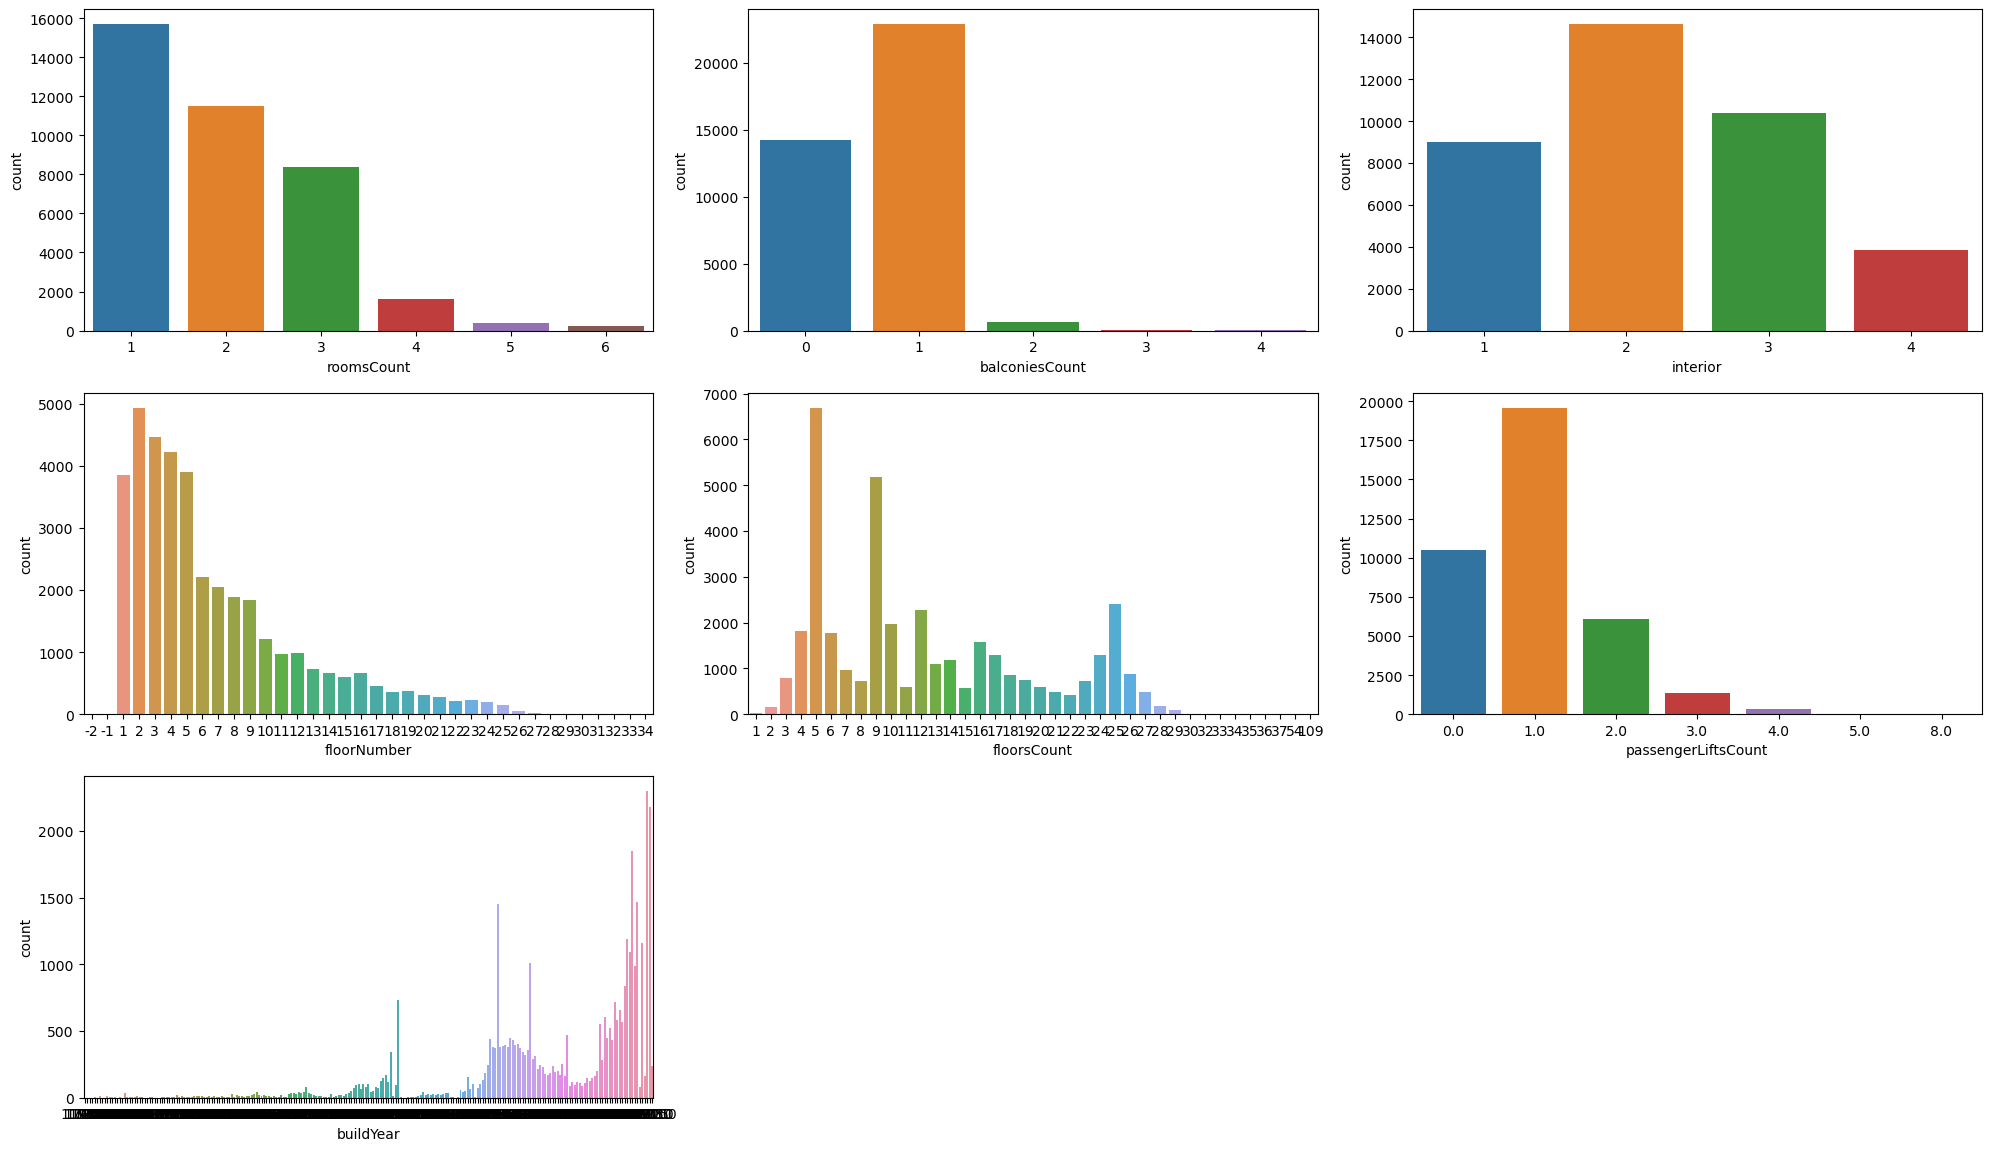

In [57]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(4, 3, index+1)
    sns.countplot(x=col, data=num_features.dropna())
fig.tight_layout(pad=1.0)

Можно наблюдать некоторые отдельные тенденции спада, как, например, в вопросе количества комнат и этажей квартиры, а также предусматриваются некоторые пиковые значения в признаках общего количества этажей дома и года постройки

Также рассмотрим распределения категориальных признаков

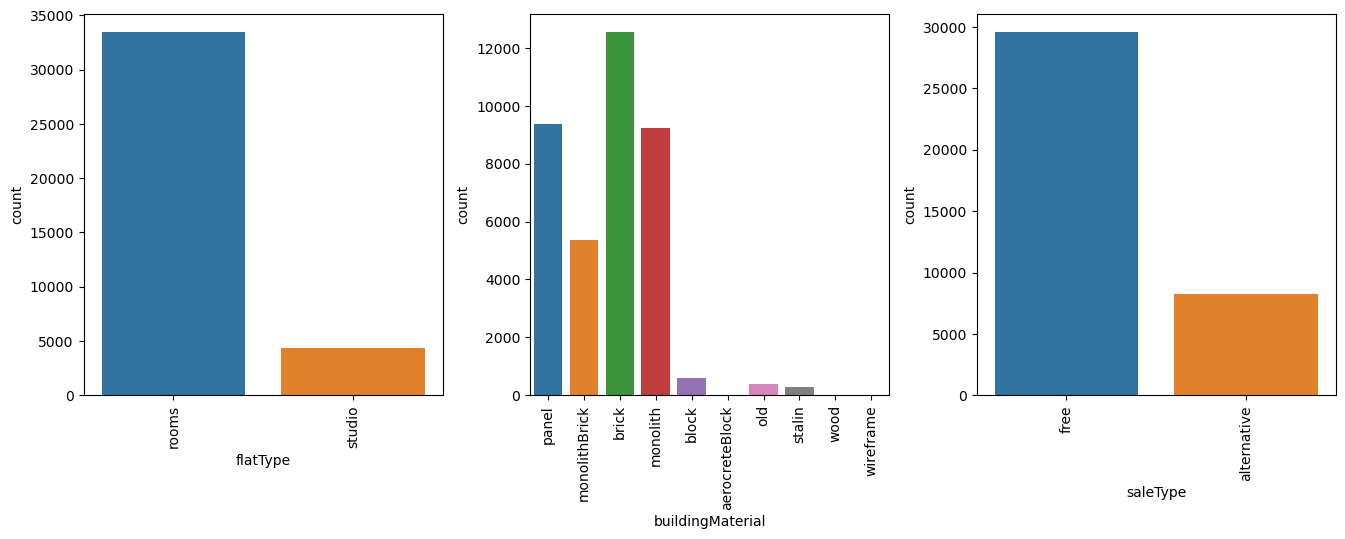

In [58]:
fig = plt.figure(figsize=(18, 20))
for index in range(len(cat_features.columns)):
    plt.subplot(4, 4, index+1)
    sns.countplot(x=cat_features.iloc[:,index], data=cat_features.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Можно наблюдать приоритет некоторых значений над остальными

Рассмотрим вопрос корреляции по отношению к целевому показателю

In [59]:
correlation = num_features.corr()

In [60]:
numeric_train = data.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['price']].sort_values(['price'], ascending=False)

,price
price,1.000000
totalArea,0.795130
livingArea,0.666280
kitchenArea,0.629816
roomsCount,0.582824
interior,0.117278
balconiesCount,0.034912
passengerLiftsCount,0.021793
floorNumber,-0.039970
floorsCount,-0.084236


Можем снова видеть, что признаки площади имеют наибольшее значение в этом плане. Рассмотрим данную тенденцию на графиках

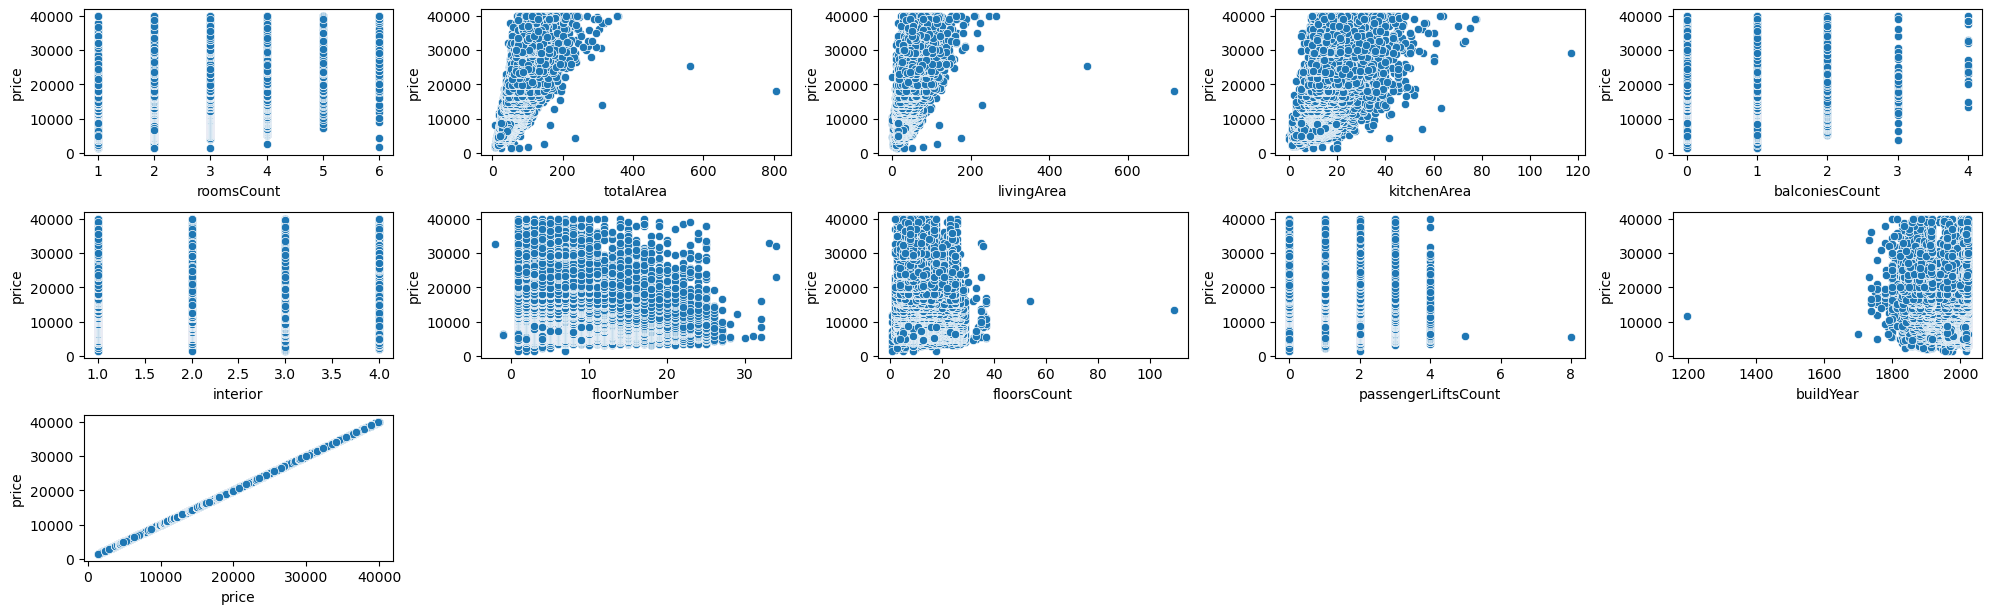

In [61]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='price', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

## Подготовка к обучению

Снова выведем график распределения целевого признака



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



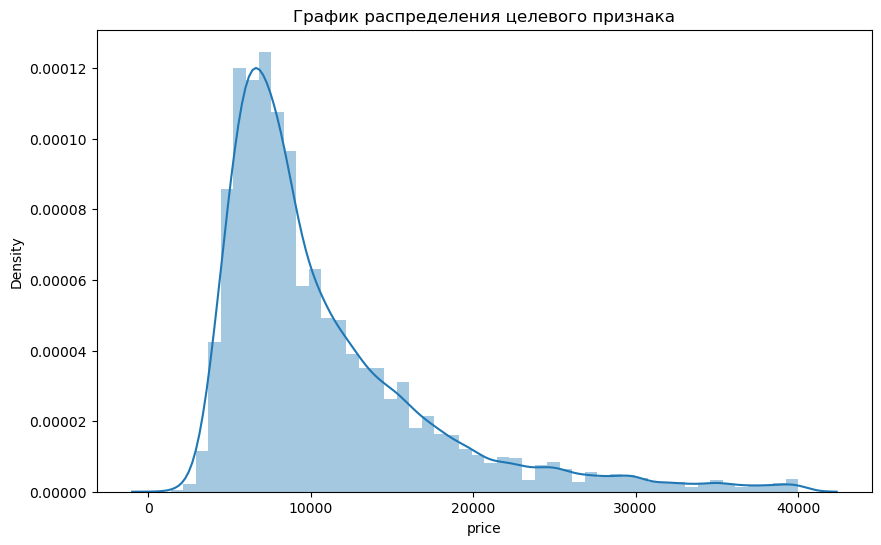

In [62]:
plt.figure(figsize=(10,6))
plt.title("График распределения целевого признака")
dist = sns.distplot(data['price'], norm_hist=False)

Можем отметить смещенность распределения, данный фактор может негативно сказаться на предсказаниях моделей. Справиться с проблемой можно посредством логарифмического преобразования.

In [63]:
data["price"] = np.log(data['price'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



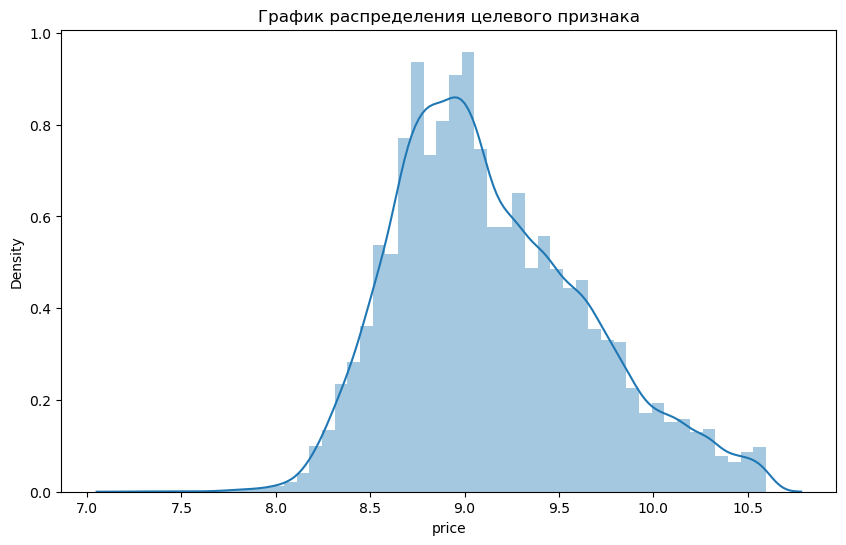

In [64]:
plt.figure(figsize=(10,6))
plt.title("График распределения целевого признака")
dist = sns.distplot(data['price'], norm_hist=False)

Хвосты убраны

Сформируем признаки обучения и целевой признак, а также поделим датасет на обучающую и тестовую выборки в соотношении 3:1

In [65]:
features = data.drop(['price'], axis=1)
target = data['price']

In [66]:
features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.25, random_state=12345)

In [67]:
print(features_train.shape)
print(target_train.shape)

print(features_test.shape)
print(target_test.shape)

(28366, 13)
(28366,)
(9456, 13)
(9456,)


В первую очередь необходимо провести кодирование категориальных признаков

In [68]:
ohe_features_ridge = features_train.select_dtypes(include='object').columns.to_list()
ohe_features_ridge

['flatType', 'buildingMaterial', 'saleType']

При этом также отдельно выделим признаки для последующих моделей градиетного бустинга - CatBoost и LGBM

In [69]:
features_train_for_cat = features_train.copy()
features_test_for_cat = features_test.copy()

In [70]:
features_train_for_lgbm = features_train.copy()
for col in ohe_features_ridge:
    features_train_for_lgbm[col] = features_train_for_cat[col].astype('category')

In [71]:
features_test_for_lgbm = features_test.copy()
for col in ohe_features_ridge:
    features_test_for_lgbm[col] = features_test_for_lgbm[col].astype('category')

In [72]:
features_train_ridge = features_train.copy()
features_test_ridge = features_test.copy()

Произведем кодирование

In [73]:
features_train_ridge['flatType'] = features_train_ridge['flatType'].astype('string')
features_train_ridge['buildingMaterial'] = features_train_ridge['buildingMaterial'].astype('string')
features_train_ridge['saleType'] = features_train_ridge['saleType'].astype('string')

In [74]:
encoder_ohe = OneHotEncoder(drop='first', sparse=False)
encoder_ohe.fit(features_train_ridge[ohe_features_ridge])

OneHotEncoder(drop='first', sparse=False)

In [75]:
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train_ridge[ohe_features_ridge])

features_train = features_train.drop(ohe_features_ridge, axis=1)

features_train

,roomsCount,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,...,buildingMaterial_block,buildingMaterial_brick,buildingMaterial_monolith,buildingMaterial_monolithBrick,buildingMaterial_old,buildingMaterial_panel,buildingMaterial_stalin,buildingMaterial_wireframe,buildingMaterial_wood,saleType_free
6001,1,29.80,15.8,6.9,1,2,5,9,1.0,1976.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30693,1,27.53,17.5,5.0,0,1,9,24,3.0,2019.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20649,1,29.20,15.3,6.5,0,3,2,9,1.0,1976.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26519,3,90.70,57.8,12.9,1,3,7,10,1.0,2004.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3736,2,57.30,42.0,9.0,0,4,3,5,0.0,1895.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,1,32.00,17.8,6.1,0,2,9,9,1.0,1980.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19892,1,32.00,15.0,9.0,1,3,21,25,2.0,2018.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2177,3,77.00,39.8,25.0,1,4,4,16,1.0,2018.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11760,3,63.00,41.0,10.0,1,2,3,9,1.0,1981.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test_ridge[ohe_features_ridge])

features_test = features_test.drop(ohe_features_ridge, axis=1)

features_test

,roomsCount,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,...,buildingMaterial_block,buildingMaterial_brick,buildingMaterial_monolith,buildingMaterial_monolithBrick,buildingMaterial_old,buildingMaterial_panel,buildingMaterial_stalin,buildingMaterial_wireframe,buildingMaterial_wood,saleType_free
1771,3,78.79,42.10,19.1,1,4,16,24,2.0,2018.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31820,3,59.60,35.00,7.2,2,1,9,12,2.0,1985.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26485,2,72.60,45.00,15.0,1,3,3,3,0.0,1917.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6661,1,33.80,16.00,7.0,0,2,2,14,2.0,1975.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33447,1,33.60,23.60,5.0,0,1,1,4,0.0,1873.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37414,2,81.10,49.15,12.3,0,1,1,7,0.0,2017.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30156,1,25.00,18.00,4.0,1,1,8,25,1.0,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18654,1,25.00,17.00,4.0,0,3,4,4,0.0,2022.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9168,2,44.60,27.50,8.2,0,2,2,9,1.0,1967.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


В свою очередь, в отношении количественных признаков осуществим масштабирование

In [77]:
numerics = features_train.select_dtypes(exclude='object').columns.to_list()
numerics

['roomsCount',
 'totalArea',
 'livingArea',
 'kitchenArea',
 'balconiesCount',
 'interior',
 'floorNumber',
 'floorsCount',
 'passengerLiftsCount',
 'buildYear',
 'flatType_studio',
 'buildingMaterial_block',
 'buildingMaterial_brick',
 'buildingMaterial_monolith',
 'buildingMaterial_monolithBrick',
 'buildingMaterial_old',
 'buildingMaterial_panel',
 'buildingMaterial_stalin',
 'buildingMaterial_wireframe',
 'buildingMaterial_wood',
 'saleType_free']

In [78]:
scaler = RobustScaler()
#scaler = StandardScaler()
features_train[numerics] = scaler.fit_transform(features_train[numerics])
features_test[numerics] = scaler.transform(features_test[numerics])
pd.options.mode.chained_assignment = None

In [79]:
features_train

,roomsCount,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,...,buildingMaterial_block,buildingMaterial_brick,buildingMaterial_monolith,buildingMaterial_monolithBrick,buildingMaterial_old,buildingMaterial_panel,buildingMaterial_stalin,buildingMaterial_wireframe,buildingMaterial_wood,saleType_free
6001,-0.5,-0.616883,-0.549107,-0.448276,0.0,0.0,0.000000,-0.090909,0.0,-0.532020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30693,-0.5,-0.690584,-0.473214,-0.775862,-1.0,-1.0,0.666667,1.272727,2.0,0.315271,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20649,-0.5,-0.636364,-0.571429,-0.517241,-1.0,1.0,-0.500000,-0.090909,0.0,-0.532020,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
26519,0.5,1.360390,1.325893,0.586207,0.0,1.0,0.333333,0.000000,0.0,0.019704,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3736,0.0,0.275974,0.620536,-0.086207,-1.0,2.0,-0.333333,-0.454545,-1.0,-2.128079,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,-0.5,-0.545455,-0.459821,-0.586207,-1.0,0.0,0.666667,-0.090909,0.0,-0.453202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19892,-0.5,-0.545455,-0.584821,-0.086207,0.0,1.0,2.666667,1.363636,1.0,0.295567,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2177,0.5,0.915584,0.522321,2.672414,0.0,2.0,-0.166667,0.545455,0.0,0.295567,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11760,0.5,0.461039,0.575893,0.086207,0.0,0.0,-0.333333,-0.090909,0.0,-0.433498,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [80]:
features_test

,roomsCount,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,...,buildingMaterial_block,buildingMaterial_brick,buildingMaterial_monolith,buildingMaterial_monolithBrick,buildingMaterial_old,buildingMaterial_panel,buildingMaterial_stalin,buildingMaterial_wireframe,buildingMaterial_wood,saleType_free
1771,0.5,0.973701,0.625000,1.655172,0.0,2.0,1.833333,1.272727,1.0,0.295567,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31820,0.5,0.350649,0.308036,-0.396552,1.0,-1.0,0.666667,0.181818,1.0,-0.354680,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26485,0.0,0.772727,0.754464,0.948276,0.0,1.0,-0.333333,-0.636364,-1.0,-1.694581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6661,-0.5,-0.487013,-0.540179,-0.431034,-1.0,0.0,-0.500000,0.363636,1.0,-0.551724,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
33447,-0.5,-0.493506,-0.200893,-0.775862,-1.0,-1.0,-0.666667,-0.545455,-1.0,-2.561576,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37414,0.0,1.048701,0.939732,0.482759,-1.0,-1.0,-0.666667,-0.272727,-1.0,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30156,-0.5,-0.772727,-0.450893,-0.948276,0.0,-1.0,0.500000,1.363636,0.0,0.334975,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18654,-0.5,-0.772727,-0.495536,-0.948276,-1.0,1.0,-0.166667,-0.545455,-1.0,0.374384,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9168,0.0,-0.136364,-0.026786,-0.224138,-1.0,0.0,-0.500000,-0.090909,0.0,-0.709360,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Таким образом, данные в полной мере преобразованы для обучения

## Обучение

### CatBoost

Оценка будет производиться с помощью метрики RMSE, переберем основные параметры

In [81]:
RANDOM_STATE = 12345

In [82]:
cat_feats = list(features_train_for_cat.select_dtypes(include='object').columns)
cat_feats

['flatType', 'buildingMaterial', 'saleType']

In [83]:
cat = CatBoostRegressor(loss_function='RMSE', eval_metric='RMSE', random_state = RANDOM_STATE, verbose=100, early_stopping_rounds=200) # logging_level='Silent'

In [84]:
train_dataset = Pool(features_train_for_cat, target_train, cat_features=cat_feats) 
#eval_dataset = Pool(features_test_for_cat, test_target, cat_features=cat_feats)

In [85]:
parameters_cat = {
    'learning_rate' : [0.05, 0.1, 0.15, 0.2],
    'n_estimators' : [1500, 2000, 2500, 3000],
    'max_depth' : [2, 3, 4],
    'l2_leaf_reg' : [0.1],
}


С помощью встроенного grid_search осуществим перебор гиперпараметров.

In [86]:
gs_cat = cat.grid_search(parameters_cat, train_dataset, plot=True, cv=5, partition_random_seed=RANDOM_STATE)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 8.7036247	test: 8.7002318	best: 8.7002318 (0)	total: 165ms	remaining: 4m 8s
100:	learn: 0.2618076	test: 0.2568279	best: 0.2568279 (100)	total: 1.65s	remaining: 22.8s
200:	learn: 0.2378258	test: 0.2357503	best: 0.2357503 (200)	total: 3.08s	remaining: 19.9s
300:	learn: 0.2314025	test: 0.2297691	best: 0.2297691 (300)	total: 4.62s	remaining: 18.4s
400:	learn: 0.2274424	test: 0.2258681	best: 0.2258681 (400)	total: 6.26s	remaining: 17.1s
500:	learn: 0.2244219	test: 0.2232441	best: 0.2232441 (500)	total: 7.76s	remaining: 15.5s
600:	learn: 0.2223851	test: 0.2214241	best: 0.2214241 (600)	total: 9.36s	remaining: 14s
700:	learn: 0.2207140	test: 0.2201795	best: 0.2201795 (700)	total: 10.9s	remaining: 12.4s
800:	learn: 0.2193515	test: 0.2188147	best: 0.2188147 (800)	total: 12.4s	remaining: 10.9s
900:	learn: 0.2182323	test: 0.2180131	best: 0.2180131 (900)	total: 13.9s	remaining: 9.25s
1000:	learn: 0.2172931	test: 0.2172610	best: 0.2172610 (1000)	total: 15.4s	remaining: 7.7s
1100:	learn: 0.

100:	learn: 0.2377350	test: 0.2361833	best: 0.2361833 (100)	total: 1.5s	remaining: 28.3s
200:	learn: 0.2268164	test: 0.2261785	best: 0.2261785 (200)	total: 3s	remaining: 26.9s
300:	learn: 0.2220732	test: 0.2216900	best: 0.2216900 (300)	total: 4.42s	remaining: 25s
400:	learn: 0.2192224	test: 0.2198371	best: 0.2198371 (400)	total: 5.83s	remaining: 23.2s
500:	learn: 0.2171716	test: 0.2179072	best: 0.2179072 (500)	total: 7.25s	remaining: 21.7s
600:	learn: 0.2155519	test: 0.2167399	best: 0.2167399 (600)	total: 8.66s	remaining: 20.2s
700:	learn: 0.2142345	test: 0.2157567	best: 0.2157561 (699)	total: 10.1s	remaining: 18.7s
800:	learn: 0.2131833	test: 0.2150632	best: 0.2150632 (800)	total: 11.5s	remaining: 17.3s
900:	learn: 0.2122684	test: 0.2145742	best: 0.2145742 (900)	total: 13.1s	remaining: 15.9s
1000:	learn: 0.2113250	test: 0.2140523	best: 0.2140523 (1000)	total: 14.5s	remaining: 14.5s
1100:	learn: 0.2105018	test: 0.2136447	best: 0.2136447 (1100)	total: 16.1s	remaining: 13.1s
1200:	learn:

2499:	learn: 0.2096149	test: 0.2121995	best: 0.2121995 (2499)	total: 36.7s	remaining: 0us

bestTest = 0.2121994866
bestIteration = 2499

8:	loss: 0.2121995	best: 0.2117804 (5)	total: 4m 6s	remaining: 17m 50s
0:	learn: 8.2471293	test: 8.2441837	best: 8.2441837 (0)	total: 18.7ms	remaining: 46.8s
100:	learn: 0.2377350	test: 0.2361833	best: 0.2361833 (100)	total: 1.58s	remaining: 37.5s
200:	learn: 0.2268164	test: 0.2261785	best: 0.2261785 (200)	total: 3.06s	remaining: 35s
300:	learn: 0.2220732	test: 0.2216900	best: 0.2216900 (300)	total: 4.54s	remaining: 33.2s
400:	learn: 0.2192224	test: 0.2198371	best: 0.2198371 (400)	total: 5.94s	remaining: 31.1s
500:	learn: 0.2171716	test: 0.2179072	best: 0.2179072 (500)	total: 7.32s	remaining: 29.2s
600:	learn: 0.2155519	test: 0.2167399	best: 0.2167399 (600)	total: 8.69s	remaining: 27.5s
700:	learn: 0.2142345	test: 0.2157567	best: 0.2157561 (699)	total: 10.1s	remaining: 25.9s
800:	learn: 0.2131833	test: 0.2150632	best: 0.2150632 (800)	total: 11.5s	rema

700:	learn: 0.2207140	test: 0.2201795	best: 0.2201795 (700)	total: 10.2s	remaining: 33.6s
800:	learn: 0.2193515	test: 0.2188147	best: 0.2188147 (800)	total: 11.7s	remaining: 32.2s
900:	learn: 0.2182323	test: 0.2180131	best: 0.2180131 (900)	total: 13.1s	remaining: 30.5s
1000:	learn: 0.2172931	test: 0.2172610	best: 0.2172610 (1000)	total: 14.6s	remaining: 29.1s
1100:	learn: 0.2164324	test: 0.2165972	best: 0.2165946 (1099)	total: 16.1s	remaining: 27.8s
1200:	learn: 0.2156527	test: 0.2159788	best: 0.2159788 (1200)	total: 17.6s	remaining: 26.4s
1300:	learn: 0.2149512	test: 0.2153925	best: 0.2153925 (1300)	total: 19.2s	remaining: 25.1s
1400:	learn: 0.2143410	test: 0.2148624	best: 0.2148624 (1400)	total: 20.6s	remaining: 23.6s
1500:	learn: 0.2137790	test: 0.2144316	best: 0.2144316 (1500)	total: 22.1s	remaining: 22.1s
1600:	learn: 0.2132743	test: 0.2140284	best: 0.2140284 (1600)	total: 23.6s	remaining: 20.6s
1700:	learn: 0.2128141	test: 0.2137397	best: 0.2137360 (1693)	total: 25s	remaining: 19

400:	learn: 0.2139389	test: 0.2219713	best: 0.2219713 (400)	total: 6.03s	remaining: 39.1s
500:	learn: 0.2120592	test: 0.2208461	best: 0.2207923 (497)	total: 7.58s	remaining: 37.8s
600:	learn: 0.2104573	test: 0.2202208	best: 0.2202180 (599)	total: 9.14s	remaining: 36.5s
700:	learn: 0.2090441	test: 0.2196347	best: 0.2196347 (700)	total: 10.7s	remaining: 35s
800:	learn: 0.2079045	test: 0.2189334	best: 0.2189226 (792)	total: 12.2s	remaining: 33.5s
900:	learn: 0.2069624	test: 0.2187892	best: 0.2187608 (889)	total: 13.7s	remaining: 31.8s
1000:	learn: 0.2061071	test: 0.2186027	best: 0.2184788 (983)	total: 15.1s	remaining: 30.1s
1100:	learn: 0.2053602	test: 0.2184767	best: 0.2184183 (1072)	total: 16.6s	remaining: 28.6s
1200:	learn: 0.2046167	test: 0.2183534	best: 0.2182310 (1194)	total: 18s	remaining: 27s
1300:	learn: 0.2039634	test: 0.2182498	best: 0.2182231 (1286)	total: 19.5s	remaining: 25.4s
1400:	learn: 0.2033841	test: 0.2182940	best: 0.2181029 (1359)	total: 20.9s	remaining: 23.9s
1500:	l

1300:	learn: 0.1878735	test: 0.2128212	best: 0.2127878 (1287)	total: 29.8s	remaining: 4.56s
1400:	learn: 0.1867745	test: 0.2126749	best: 0.2126662 (1398)	total: 32.2s	remaining: 2.28s
1499:	learn: 0.1857323	test: 0.2124997	best: 0.2124828 (1497)	total: 34.4s	remaining: 0us

bestTest = 0.212482837
bestIteration = 1497

19:	loss: 0.2124828	best: 0.2077940 (17)	total: 11m 4s	remaining: 15m 30s
0:	learn: 8.7036302	test: 8.7002702	best: 8.7002702 (0)	total: 19.2ms	remaining: 38.4s
100:	learn: 0.2512643	test: 0.2466341	best: 0.2466341 (100)	total: 2.2s	remaining: 41.5s
200:	learn: 0.2296209	test: 0.2283077	best: 0.2283077 (200)	total: 4.38s	remaining: 39.2s
300:	learn: 0.2232361	test: 0.2219876	best: 0.2219876 (300)	total: 6.6s	remaining: 37.2s
400:	learn: 0.2193688	test: 0.2185518	best: 0.2185518 (400)	total: 8.76s	remaining: 34.9s
500:	learn: 0.2165292	test: 0.2163450	best: 0.2163450 (500)	total: 10.9s	remaining: 32.5s
600:	learn: 0.2142291	test: 0.2144825	best: 0.2144825 (600)	total: 13s	

1999:	learn: 0.1809723	test: 0.2120915	best: 0.2119432 (1872)	total: 44.5s	remaining: 0us

bestTest = 0.2119432379
bestIteration = 1872

23:	loss: 0.2119432	best: 0.2070071 (21)	total: 13m 58s	remaining: 13m 58s
0:	learn: 8.7036302	test: 8.7002702	best: 8.7002702 (0)	total: 21.3ms	remaining: 53.3s
100:	learn: 0.2512643	test: 0.2466341	best: 0.2466341 (100)	total: 2.5s	remaining: 59.4s
200:	learn: 0.2296209	test: 0.2283077	best: 0.2283077 (200)	total: 4.78s	remaining: 54.7s
300:	learn: 0.2232361	test: 0.2219876	best: 0.2219876 (300)	total: 7.03s	remaining: 51.4s
400:	learn: 0.2193688	test: 0.2185518	best: 0.2185518 (400)	total: 9.24s	remaining: 48.4s
500:	learn: 0.2165292	test: 0.2163450	best: 0.2163450 (500)	total: 11.5s	remaining: 45.7s
600:	learn: 0.2142291	test: 0.2144825	best: 0.2144825 (600)	total: 13.7s	remaining: 43.2s
700:	learn: 0.2125195	test: 0.2132977	best: 0.2132977 (700)	total: 15.8s	remaining: 40.6s
800:	learn: 0.2110351	test: 0.2126748	best: 0.2126748 (800)	total: 18s	r

700:	learn: 0.1968255	test: 0.2142972	best: 0.2142449 (667)	total: 15.9s	remaining: 40.7s
800:	learn: 0.1951275	test: 0.2138918	best: 0.2138918 (800)	total: 18.1s	remaining: 38.4s
900:	learn: 0.1933804	test: 0.2136492	best: 0.2135907 (834)	total: 20.3s	remaining: 36s
1000:	learn: 0.1918906	test: 0.2134370	best: 0.2134349 (999)	total: 22.5s	remaining: 33.7s
1100:	learn: 0.1905198	test: 0.2130535	best: 0.2130148 (1090)	total: 24.7s	remaining: 31.4s
1200:	learn: 0.1891300	test: 0.2128751	best: 0.2128431 (1182)	total: 26.8s	remaining: 29s
1300:	learn: 0.1878735	test: 0.2128212	best: 0.2127878 (1287)	total: 29s	remaining: 26.7s
1400:	learn: 0.1867745	test: 0.2126749	best: 0.2126662 (1398)	total: 31.2s	remaining: 24.4s
1500:	learn: 0.1857119	test: 0.2125029	best: 0.2124828 (1497)	total: 33.3s	remaining: 22.2s
1600:	learn: 0.1847533	test: 0.2123453	best: 0.2123453 (1600)	total: 35.4s	remaining: 19.9s
1700:	learn: 0.1838473	test: 0.2123800	best: 0.2122117 (1634)	total: 37.6s	remaining: 17.7s
1

1000:	learn: 0.1956723	test: 0.2104738	best: 0.2104738 (1000)	total: 22.3s	remaining: 44.5s
1100:	learn: 0.1943509	test: 0.2101011	best: 0.2101010 (1099)	total: 24.5s	remaining: 42.3s
1200:	learn: 0.1931928	test: 0.2099374	best: 0.2099374 (1200)	total: 26.8s	remaining: 40.1s
1300:	learn: 0.1921643	test: 0.2098383	best: 0.2097890 (1294)	total: 29s	remaining: 37.9s
1400:	learn: 0.1910550	test: 0.2095493	best: 0.2095488 (1397)	total: 31.3s	remaining: 35.7s
1500:	learn: 0.1900221	test: 0.2093251	best: 0.2093212 (1494)	total: 33.4s	remaining: 33.3s
1600:	learn: 0.1891129	test: 0.2091273	best: 0.2090852 (1589)	total: 35.7s	remaining: 31.2s
1700:	learn: 0.1881667	test: 0.2089995	best: 0.2089995 (1700)	total: 38s	remaining: 29s
1800:	learn: 0.1872972	test: 0.2089656	best: 0.2089300 (1779)	total: 40.2s	remaining: 26.8s
1900:	learn: 0.1864759	test: 0.2088880	best: 0.2088755 (1891)	total: 42.5s	remaining: 24.6s
2000:	learn: 0.1857271	test: 0.2088097	best: 0.2088097 (2000)	total: 44.8s	remaining: 

1100:	learn: 0.1809317	test: 0.2076836	best: 0.2076060 (1090)	total: 29.9s	remaining: 10.8s
1200:	learn: 0.1794133	test: 0.2075316	best: 0.2075002 (1198)	total: 32.6s	remaining: 8.12s
1300:	learn: 0.1775829	test: 0.2074435	best: 0.2073654 (1252)	total: 35.3s	remaining: 5.4s
1400:	learn: 0.1760662	test: 0.2071713	best: 0.2071464 (1360)	total: 38s	remaining: 2.68s
1499:	learn: 0.1747297	test: 0.2072843	best: 0.2071266 (1414)	total: 40.6s	remaining: 0us

bestTest = 0.2071266374
bestIteration = 1414

34:	loss: 0.2071266	best: 0.2044989 (33)	total: 23m 46s	remaining: 8m 49s
0:	learn: 7.3327245	test: 7.3310277	best: 7.3310277 (0)	total: 27.7ms	remaining: 41.6s
100:	learn: 0.2151664	test: 0.2226111	best: 0.2226111 (100)	total: 2.7s	remaining: 37.5s
200:	learn: 0.2044334	test: 0.2165605	best: 0.2165246 (197)	total: 5.39s	remaining: 34.8s
300:	learn: 0.1983774	test: 0.2142874	best: 0.2142874 (300)	total: 8.06s	remaining: 32.1s
400:	learn: 0.1934651	test: 0.2129496	best: 0.2129129 (388)	total: 1

600:	learn: 0.1867600	test: 0.2119480	best: 0.2119278 (599)	total: 17.5s	remaining: 40.8s
700:	learn: 0.1842172	test: 0.2116111	best: 0.2115589 (697)	total: 20.5s	remaining: 38.1s
800:	learn: 0.1815594	test: 0.2113731	best: 0.2113728 (797)	total: 23.4s	remaining: 35.1s
900:	learn: 0.1793527	test: 0.2110775	best: 0.2110313 (891)	total: 26.3s	remaining: 32.1s
1000:	learn: 0.1772321	test: 0.2109899	best: 0.2109212 (985)	total: 29.2s	remaining: 29.1s
1100:	learn: 0.1752924	test: 0.2109128	best: 0.2108270 (1080)	total: 32s	remaining: 26.1s
1200:	learn: 0.1734760	test: 0.2108128	best: 0.2107698 (1182)	total: 34.9s	remaining: 23.2s
1300:	learn: 0.1717845	test: 0.2108879	best: 0.2107675 (1211)	total: 37.7s	remaining: 20.2s
1400:	learn: 0.1700192	test: 0.2109212	best: 0.2107675 (1211)	total: 40.4s	remaining: 17.3s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2107675203
bestIteration = 1211

39:	loss: 0.2107675	best: 0.2042589 (37)	total: 27m 37s	remaining: 5m 31s
0:	lear

1300:	learn: 0.1717845	test: 0.2108879	best: 0.2107675 (1211)	total: 36s	remaining: 33.2s
1400:	learn: 0.1700192	test: 0.2109212	best: 0.2107675 (1211)	total: 38.8s	remaining: 30.4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2107675203
bestIteration = 1211

43:	loss: 0.2107675	best: 0.2039829 (40)	total: 31m 2s	remaining: 2m 49s
0:	learn: 8.7032343	test: 8.6999105	best: 8.6999105 (0)	total: 27.2ms	remaining: 1m 21s
100:	learn: 0.2480321	test: 0.2440539	best: 0.2440539 (100)	total: 2.79s	remaining: 1m 20s
200:	learn: 0.2256955	test: 0.2251095	best: 0.2251095 (200)	total: 5.49s	remaining: 1m 16s
300:	learn: 0.2184847	test: 0.2185312	best: 0.2185312 (300)	total: 8.27s	remaining: 1m 14s
400:	learn: 0.2140437	test: 0.2152710	best: 0.2152671 (399)	total: 11s	remaining: 1m 11s
500:	learn: 0.2108641	test: 0.2131501	best: 0.2131501 (500)	total: 13.7s	remaining: 1m 8s
600:	learn: 0.2080544	test: 0.2115302	best: 0.2115302 (600)	total: 16.4s	remaining: 1m 5s
700:	learn: 0

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2107675203
bestIteration = 1211

47:	loss: 0.2107675	best: 0.2033914 (44)	total: 34m 38s	remaining: 0us
Estimating final quality...
Training on fold [0/5]
0:	learn: 8.7027450	test: 8.7033876	best: 8.7033876 (0)	total: 25.5ms	remaining: 1m 16s
100:	learn: 0.2464380	test: 0.2457693	best: 0.2457693 (100)	total: 2.85s	remaining: 1m 21s
200:	learn: 0.2251498	test: 0.2278768	best: 0.2278768 (200)	total: 5.51s	remaining: 1m 16s
300:	learn: 0.2176968	test: 0.2223121	best: 0.2223121 (300)	total: 8.21s	remaining: 1m 13s
400:	learn: 0.2132984	test: 0.2192599	best: 0.2192599 (400)	total: 10.9s	remaining: 1m 10s
500:	learn: 0.2097849	test: 0.2170466	best: 0.2170466 (500)	total: 13.5s	remaining: 1m 7s
600:	learn: 0.2070126	test: 0.2153357	best: 0.2153357 (600)	total: 16.2s	remaining: 1m 4s
700:	learn: 0.2047364	test: 0.2141883	best: 0.2141883 (700)	total: 18.9s	remaining: 1m 2s
800:	learn: 0.2027714	test: 0.2132834	best: 0.2132834 

2400:	learn: 0.1866281	test: 0.2080990	best: 0.2080837 (2371)	total: 1m 8s	remaining: 17s
2500:	learn: 0.1859693	test: 0.2080028	best: 0.2079984 (2498)	total: 1m 11s	remaining: 14.2s
2600:	learn: 0.1853691	test: 0.2078905	best: 0.2078881 (2578)	total: 1m 13s	remaining: 11.3s
2700:	learn: 0.1846824	test: 0.2078096	best: 0.2078082 (2699)	total: 1m 16s	remaining: 8.51s
2800:	learn: 0.1839962	test: 0.2077681	best: 0.2077334 (2767)	total: 1m 19s	remaining: 5.66s
2900:	learn: 0.1833395	test: 0.2076313	best: 0.2076250 (2898)	total: 1m 22s	remaining: 2.81s
2999:	learn: 0.1826837	test: 0.2075904	best: 0.2075772 (2979)	total: 1m 25s	remaining: 0us

bestTest = 0.2075772149
bestIteration = 2979

Training on fold [3/5]
0:	learn: 8.7026847	test: 8.7037077	best: 8.7037077 (0)	total: 25ms	remaining: 1m 14s
100:	learn: 0.2468630	test: 0.2514242	best: 0.2514242 (100)	total: 2.82s	remaining: 1m 21s
200:	learn: 0.2249718	test: 0.2299783	best: 0.2299783 (200)	total: 5.81s	remaining: 1m 20s
300:	learn: 0.21

In [87]:
results_cat = pd.DataFrame(gs_cat)
results_cat

,params,cv_results
depth,4.00,NaN
iterations,3000.00,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
learning_rate,0.05,NaN
l2_leaf_reg,0.10,NaN
test-RMSE-mean,NaN,"[8.702892953372963, 8.268852947672514, 7.85625..."
test-RMSE-std,NaN,"[0.0017051669812274833, 0.0018916562838312608,..."
train-RMSE-mean,NaN,"[8.702876352114998, 8.26881631843245, 7.856217..."
train-RMSE-std,NaN,"[0.00040547538842988816, 0.000386075386501837,..."


In [88]:
print('Лучший результат RMSE на grid_search:', round(min(results_cat.T["test-RMSE-mean"]["cv_results"]), 3))

Лучший результат RMSE на grid_search: 0.207


Рассмотрим также важность признаков и влияние значений признаков на результат.

In [89]:
explainer_cat = shap.Explainer(cat)
shap_values_cat = explainer_cat(features_train_for_cat)

Text(0.5, 1.0, 'Feature Importance')

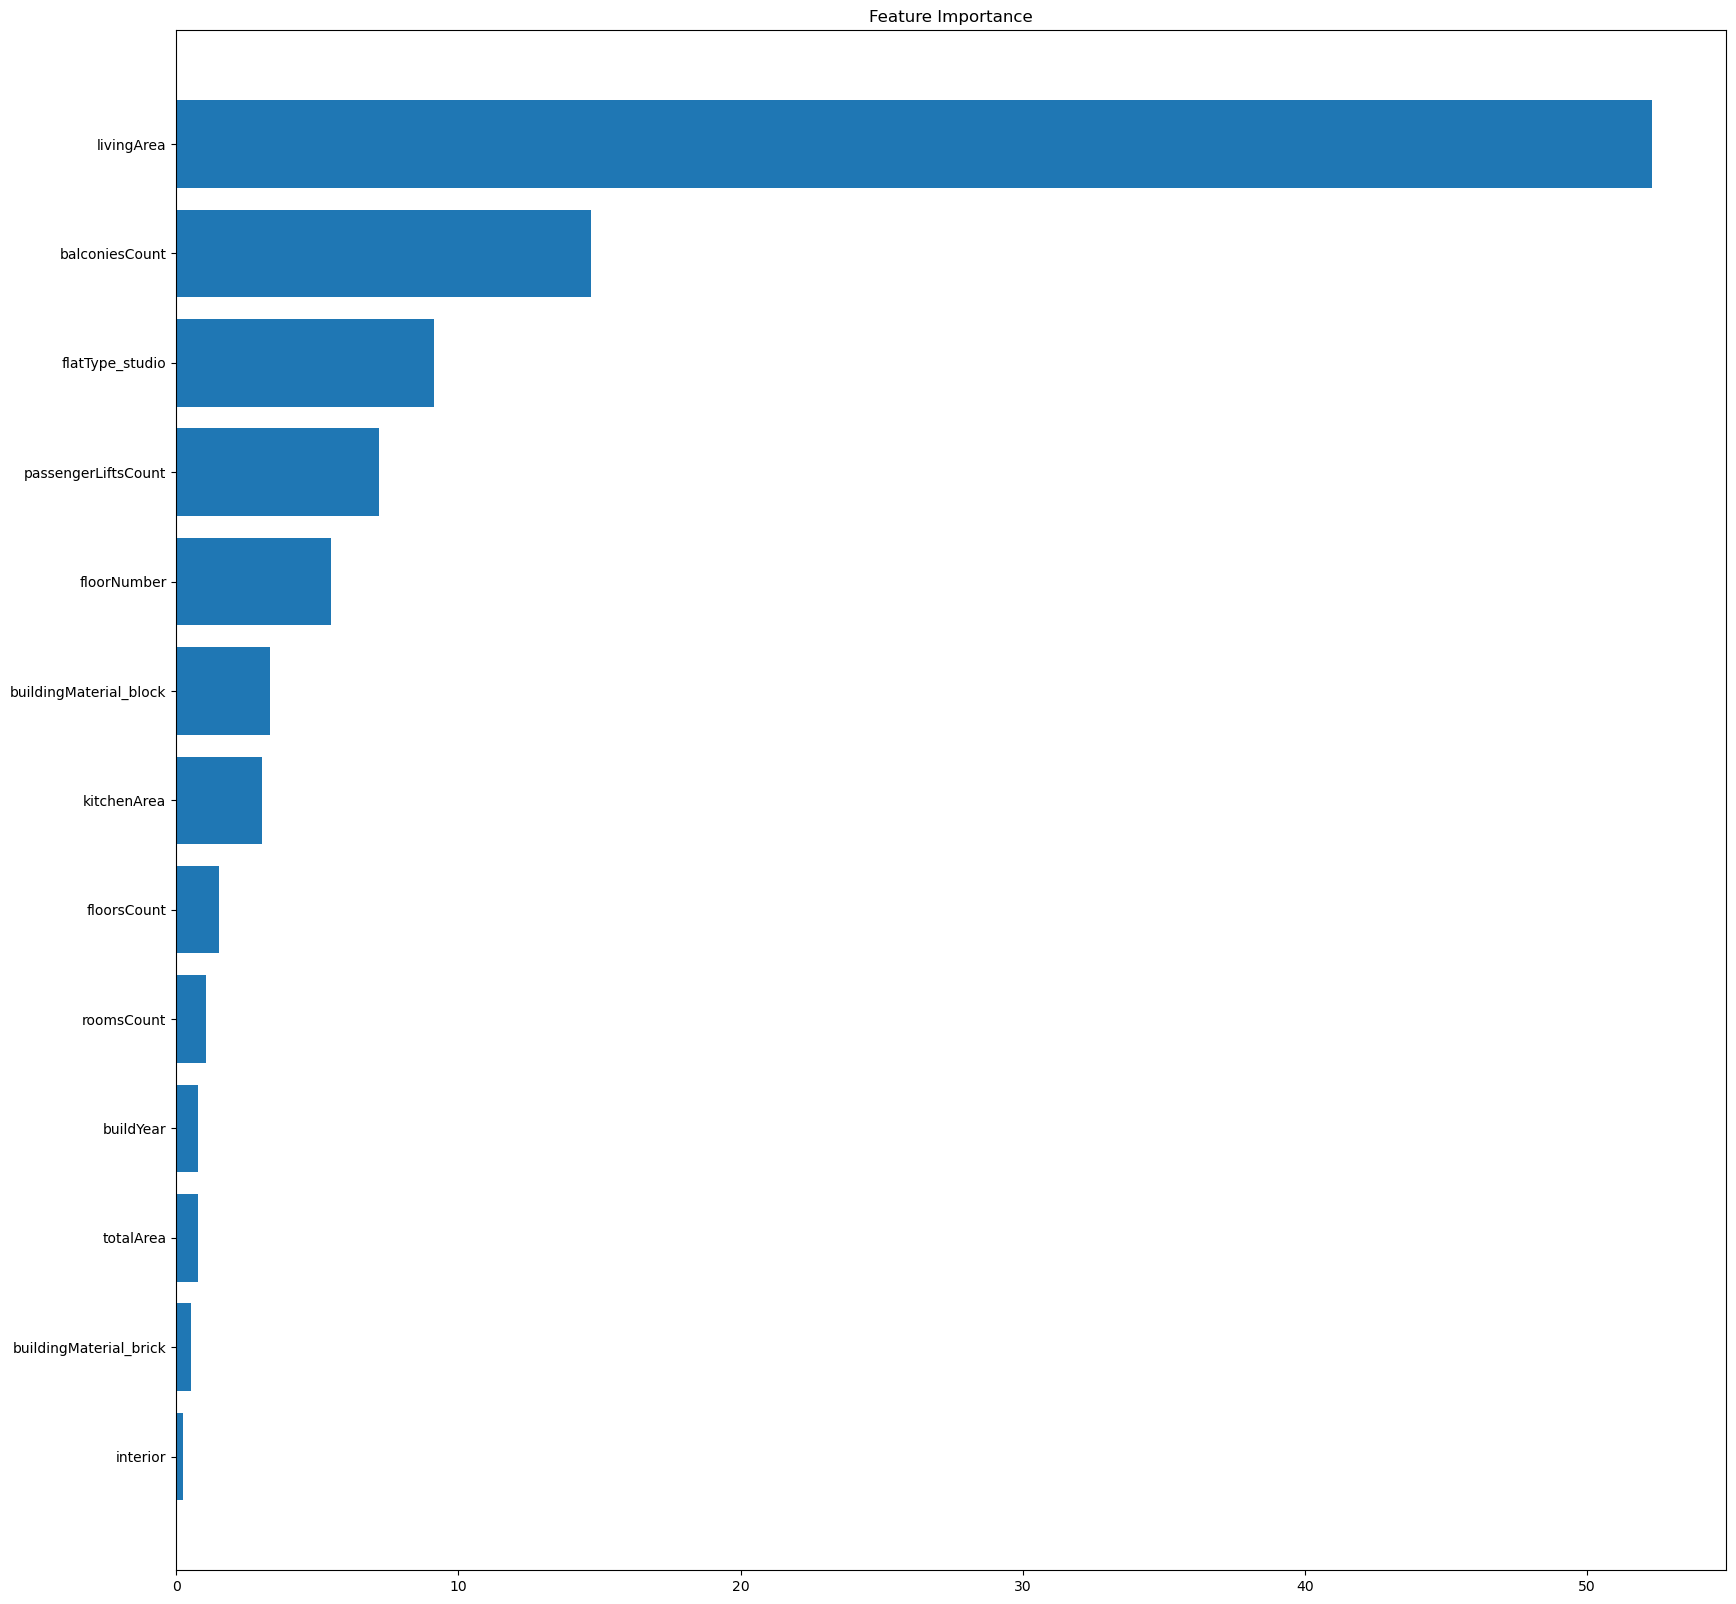

In [90]:
feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_test.columns)[sorted_idx])
plt.title('Feature Importance')

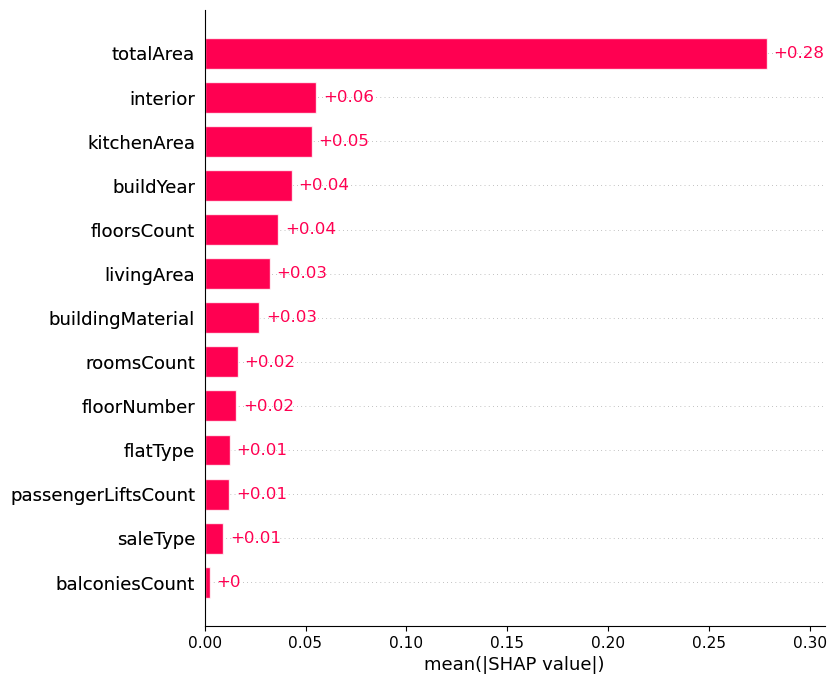

In [91]:
shap.plots.bar(shap_values_cat, max_display=68)

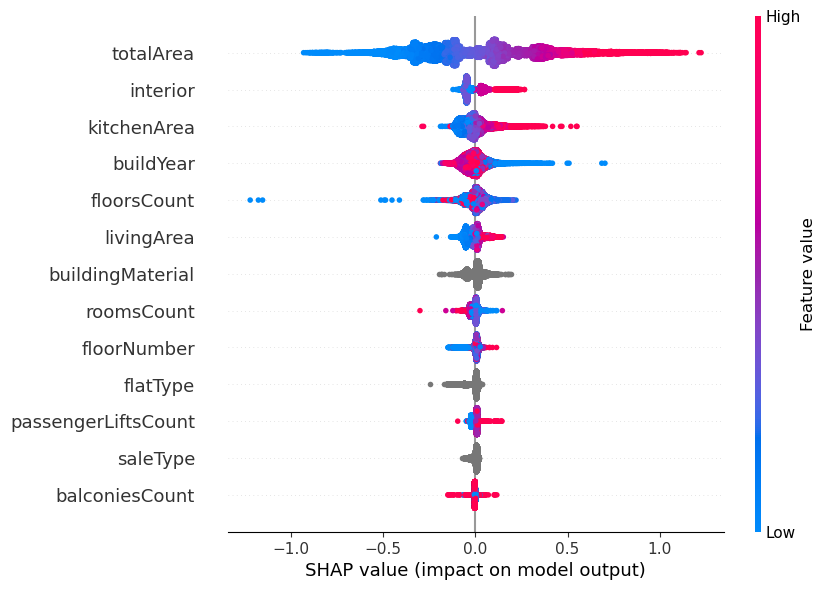

In [92]:
shap.plots.beeswarm(shap_values_cat, max_display=68)

Дополнительно проведем кросс-валидацию на наилучших параметрах.

In [93]:
print('Лучшие гиперпараметры CatBoost:', gs_cat["params"])

Лучшие гиперпараметры CatBoost: {'depth': 4, 'iterations': 3000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.1}


In [94]:
params_cat_for_cv = {
          "depth": 4,
          "iterations": 3000,
          "loss_function": "RMSE",
          "eval_metric": "RMSE",
          "learning_rate": 0.05,
          "l2_leaf_reg": 0.1,
          "verbose": 100}

In [95]:
scores_rmse = cv(params=params_cat_for_cv,
            pool=train_dataset,
            fold_count=5,
            shuffle=True,
            plot="True",
            partition_random_seed=RANDOM_STATE)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 8.7021504	test: 8.7027427	best: 8.7027427 (0)	total: 23.7ms	remaining: 1m 11s
100:	learn: 0.2482880	test: 0.2474979	best: 0.2474979 (100)	total: 3.12s	remaining: 1m 29s
200:	learn: 0.2255126	test: 0.2283582	best: 0.2283582 (200)	total: 6.06s	remaining: 1m 24s
300:	learn: 0.2178590	test: 0.2229157	best: 0.2229157 (300)	total: 8.96s	remaining: 1m 20s
400:	learn: 0.2133118	test: 0.2197428	best: 0.2197428 (400)	total: 11.8s	remaining: 1m 16s
500:	learn: 0.2097468	test: 0.2174879	best: 0.2174879 (500)	total: 14.7s	remaining: 1m 13s
600:	learn: 0.2067921	test: 0.2156195	best: 0.2156195 (600)	total: 17.7s	remaining: 1m 10s
700:	learn: 0.2046894	test: 0.2146965	best: 0.2146937 (696)	total: 20.6s	remaining: 1m 7s
800:	learn: 0.2027217	test: 0.2138274	best: 0.2138274 (800)	total: 23.7s	remaining: 1m 4s
900:	learn: 0.2009545	test: 0.2131709	best: 0.2131709 (900)	total: 27s	remaining: 1m 2s
1000:	learn: 0.1994134	test: 0.2125303	best: 0.2125303 (1000)	total: 30s	re

2600:	learn: 0.1851040	test: 0.2078333	best: 0.2078198 (2573)	total: 1m 30s	remaining: 13.9s
2700:	learn: 0.1844159	test: 0.2076429	best: 0.2076429 (2700)	total: 1m 34s	remaining: 10.4s
2800:	learn: 0.1837405	test: 0.2075887	best: 0.2075748 (2784)	total: 1m 37s	remaining: 6.94s
2900:	learn: 0.1831261	test: 0.2073899	best: 0.2073891 (2896)	total: 1m 41s	remaining: 3.45s
2999:	learn: 0.1825335	test: 0.2072823	best: 0.2072823 (2999)	total: 1m 44s	remaining: 0us

bestTest = 0.2072822656
bestIteration = 2999

Training on fold [3/5]
0:	learn: 8.7020882	test: 8.7031125	best: 8.7031125 (0)	total: 23.5ms	remaining: 1m 10s
100:	learn: 0.2486262	test: 0.2525543	best: 0.2525543 (100)	total: 3.54s	remaining: 1m 41s
200:	learn: 0.2255631	test: 0.2293518	best: 0.2293518 (200)	total: 7.28s	remaining: 1m 41s
300:	learn: 0.2178760	test: 0.2231747	best: 0.2231747 (300)	total: 11s	remaining: 1m 38s
400:	learn: 0.2130932	test: 0.2198367	best: 0.2198367 (400)	total: 14.6s	remaining: 1m 34s
500:	learn: 0.209

In [96]:
scores_rmse[scores_rmse['test-RMSE-mean'] == scores_rmse['test-RMSE-mean'].min()]

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
2999,2999,0.206774,0.002163,0.182202,0.000416


In [97]:
rmse_cat = round(scores_rmse['test-RMSE-mean'].min(), 3)
print('RMSE при CatBoost на кросс-валидации:', rmse_cat)

RMSE при CatBoost на кросс-валидации: 0.207


In [98]:
val = scores_rmse[scores_rmse['test-RMSE-mean'] == scores_rmse['test-RMSE-mean'].min()]['iterations']
val = val.values[0]
print('Лучшая итерация:', val)

Лучшая итерация: 2999


In [99]:
params_cat_for_cv_mae = {
          "depth": 4,
          "iterations": 3000,
          "loss_function": "MAE",
          "eval_metric": "MAE",
          "learning_rate": 0.05,
          "l2_leaf_reg": 0.1,
          "verbose": 100}

scores_mae = cv(params=params_cat_for_cv_mae,
            pool=train_dataset,
            fold_count=5,
            shuffle=True,
            plot="True",
            partition_random_seed=RANDOM_STATE)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 8.6902455	test: 8.6909327	best: 8.6909327 (0)	total: 41.4ms	remaining: 2m 4s
100:	learn: 0.1923643	test: 0.1916095	best: 0.1916095 (100)	total: 3.16s	remaining: 1m 30s
200:	learn: 0.1707120	test: 0.1719145	best: 0.1719145 (200)	total: 6.05s	remaining: 1m 24s
300:	learn: 0.1653782	test: 0.1675682	best: 0.1675682 (300)	total: 8.95s	remaining: 1m 20s
400:	learn: 0.1625492	test: 0.1658262	best: 0.1658262 (400)	total: 11.8s	remaining: 1m 16s
500:	learn: 0.1600391	test: 0.1642350	best: 0.1642350 (500)	total: 14.7s	remaining: 1m 13s
600:	learn: 0.1581735	test: 0.1633077	best: 0.1633009 (599)	total: 17.7s	remaining: 1m 10s
700:	learn: 0.1567282	test: 0.1626304	best: 0.1626304 (700)	total: 20.6s	remaining: 1m 7s
800:	learn: 0.1556257	test: 0.1621784	best: 0.1621784 (800)	total: 23.5s	remaining: 1m 4s
900:	learn: 0.1545819	test: 0.1618098	best: 0.1618098 (900)	total: 26.4s	remaining: 1m 1s
1000:	learn: 0.1536381	test: 0.1614628	best: 0.1614628 (1000)	total: 29.3s

2600:	learn: 0.1457331	test: 0.1586904	best: 0.1586864 (2592)	total: 1m 29s	remaining: 13.8s
2700:	learn: 0.1454783	test: 0.1586313	best: 0.1586295 (2696)	total: 1m 33s	remaining: 10.4s
2800:	learn: 0.1451641	test: 0.1585764	best: 0.1585653 (2765)	total: 1m 36s	remaining: 6.88s
2900:	learn: 0.1449053	test: 0.1585178	best: 0.1585177 (2886)	total: 1m 40s	remaining: 3.43s
2999:	learn: 0.1446114	test: 0.1584772	best: 0.1584772 (2999)	total: 1m 44s	remaining: 0us

bestTest = 0.1584772078
bestIteration = 2999

Training on fold [3/5]
0:	learn: 8.6899555	test: 8.6908753	best: 8.6908753 (0)	total: 30.7ms	remaining: 1m 32s
100:	learn: 0.1920211	test: 0.1956650	best: 0.1956650 (100)	total: 4.01s	remaining: 1m 55s
200:	learn: 0.1705114	test: 0.1736589	best: 0.1736589 (200)	total: 7.68s	remaining: 1m 47s
300:	learn: 0.1648573	test: 0.1692772	best: 0.1692772 (300)	total: 11.4s	remaining: 1m 41s
400:	learn: 0.1618813	test: 0.1672363	best: 0.1672308 (399)	total: 15.4s	remaining: 1m 39s
500:	learn: 0.1

In [100]:
scores_mae[scores_mae['test-MAE-mean'] == scores_mae['test-MAE-mean'].min()]

,iterations,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std
2999,2999,0.158403,0.001086,0.144673,0.000168


In [101]:
mae_cat = round(scores_mae.loc[val]['test-MAE-mean'], 3)
print('MAE при CatBoost на кросс-валидации:', mae_cat)

MAE при CatBoost на кросс-валидации: 0.158


### LGBM

Далее - LGBM

In [102]:
lgbm = LGBMRegressor(random_state=RANDOM_STATE, boosting_type='gbdt',objective='regression')

In [103]:
params_lgbm = {
    'max_depth' : [5, 8, 10],
    'learning_rate' : [0.05, 0.1, 0.2],
    'n_estimators' : [500, 1000, 1500],
}

In [104]:
%%time

grid_lgbm = GridSearchCV(lgbm, cv=5, param_grid=params_lgbm, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_root_mean_squared_error', verbose=10).fit(features_train_for_lgbm, target_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START learning_rate=0.05, max_depth=5, n_estimators=500..........
[CV 1/5; 1/27] END learning_rate=0.05, max_depth=5, n_estimators=500; neg_mean_absolute_error: (test=-0.158) neg_root_mean_squared_error: (test=-0.209) total time=   0.8s
[CV 2/5; 1/27] START learning_rate=0.05, max_depth=5, n_estimators=500..........
[CV 2/5; 1/27] END learning_rate=0.05, max_depth=5, n_estimators=500; neg_mean_absolute_error: (test=-0.156) neg_root_mean_squared_error: (test=-0.204) total time=   0.6s
[CV 3/5; 1/27] START learning_rate=0.05, max_depth=5, n_estimators=500..........
[CV 3/5; 1/27] END learning_rate=0.05, max_depth=5, n_estimators=500; neg_mean_absolute_error: (test=-0.158) neg_root_mean_squared_error: (test=-0.211) total time=   0.6s
[CV 4/5; 1/27] START learning_rate=0.05, max_depth=5, n_estimators=500..........
[CV 4/5; 1/27] END learning_rate=0.05, max_depth=5, n_estimators=500; neg_mean_absolute_error: (test=

[CV 3/5; 7/27] END learning_rate=0.05, max_depth=10, n_estimators=500; neg_mean_absolute_error: (test=-0.156) neg_root_mean_squared_error: (test=-0.208) total time=   0.7s
[CV 4/5; 7/27] START learning_rate=0.05, max_depth=10, n_estimators=500.........
[CV 4/5; 7/27] END learning_rate=0.05, max_depth=10, n_estimators=500; neg_mean_absolute_error: (test=-0.154) neg_root_mean_squared_error: (test=-0.205) total time=   0.6s
[CV 5/5; 7/27] START learning_rate=0.05, max_depth=10, n_estimators=500.........
[CV 5/5; 7/27] END learning_rate=0.05, max_depth=10, n_estimators=500; neg_mean_absolute_error: (test=-0.157) neg_root_mean_squared_error: (test=-0.209) total time=   0.8s
[CV 1/5; 8/27] START learning_rate=0.05, max_depth=10, n_estimators=1000........
[CV 1/5; 8/27] END learning_rate=0.05, max_depth=10, n_estimators=1000; neg_mean_absolute_error: (test=-0.154) neg_root_mean_squared_error: (test=-0.204) total time=   1.3s
[CV 2/5; 8/27] START learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 14/27] END learning_rate=0.1, max_depth=8, n_estimators=1000; neg_mean_absolute_error: (test=-0.154) neg_root_mean_squared_error: (test=-0.205) total time=   1.2s
[CV 2/5; 14/27] START learning_rate=0.1, max_depth=8, n_estimators=1000.........
[CV 2/5; 14/27] END learning_rate=0.1, max_depth=8, n_estimators=1000; neg_mean_absolute_error: (test=-0.152) neg_root_mean_squared_error: (test=-0.200) total time=   1.3s
[CV 3/5; 14/27] START learning_rate=0.1, max_depth=8, n_estimators=1000.........
[CV 3/5; 14/27] END learning_rate=0.1, max_depth=8, n_estimators=1000; neg_mean_absolute_error: (test=-0.154) neg_root_mean_squared_error: (test=-0.207) total time=   1.2s
[CV 4/5; 14/27] START learning_rate=0.1, max_depth=8, n_estimators=1000.........
[CV 4/5; 14/27] END learning_rate=0.1, max_depth=8, n_estimators=1000; neg_mean_absolute_error: (test=-0.154) neg_root_mean_squared_error: (test=-0.207) total time=   1.3s
[CV 5/5; 14/27] START learning_rate=0.1, max_depth=8, n_estimators=10

[CV 4/5; 20/27] END learning_rate=0.2, max_depth=5, n_estimators=1000; neg_mean_absolute_error: (test=-0.157) neg_root_mean_squared_error: (test=-0.210) total time=   1.0s
[CV 5/5; 20/27] START learning_rate=0.2, max_depth=5, n_estimators=1000.........
[CV 5/5; 20/27] END learning_rate=0.2, max_depth=5, n_estimators=1000; neg_mean_absolute_error: (test=-0.159) neg_root_mean_squared_error: (test=-0.212) total time=   1.0s
[CV 1/5; 21/27] START learning_rate=0.2, max_depth=5, n_estimators=1500.........
[CV 1/5; 21/27] END learning_rate=0.2, max_depth=5, n_estimators=1500; neg_mean_absolute_error: (test=-0.158) neg_root_mean_squared_error: (test=-0.209) total time=   1.3s
[CV 2/5; 21/27] START learning_rate=0.2, max_depth=5, n_estimators=1500.........
[CV 2/5; 21/27] END learning_rate=0.2, max_depth=5, n_estimators=1500; neg_mean_absolute_error: (test=-0.156) neg_root_mean_squared_error: (test=-0.205) total time=   1.5s
[CV 3/5; 21/27] START learning_rate=0.2, max_depth=5, n_estimators=15

[CV 2/5; 27/27] END learning_rate=0.2, max_depth=10, n_estimators=1500; neg_mean_absolute_error: (test=-0.155) neg_root_mean_squared_error: (test=-0.204) total time=   2.0s
[CV 3/5; 27/27] START learning_rate=0.2, max_depth=10, n_estimators=1500........
[CV 3/5; 27/27] END learning_rate=0.2, max_depth=10, n_estimators=1500; neg_mean_absolute_error: (test=-0.158) neg_root_mean_squared_error: (test=-0.214) total time=   2.0s
[CV 4/5; 27/27] START learning_rate=0.2, max_depth=10, n_estimators=1500........
[CV 4/5; 27/27] END learning_rate=0.2, max_depth=10, n_estimators=1500; neg_mean_absolute_error: (test=-0.157) neg_root_mean_squared_error: (test=-0.211) total time=   1.8s
[CV 5/5; 27/27] START learning_rate=0.2, max_depth=10, n_estimators=1500........
[CV 5/5; 27/27] END learning_rate=0.2, max_depth=10, n_estimators=1500; neg_mean_absolute_error: (test=-0.158) neg_root_mean_squared_error: (test=-0.212) total time=   1.9s
Wall time: 2min 53s


In [105]:
print('Лучшие гиперпараметры LGBM:', grid_lgbm.best_params_)

Лучшие гиперпараметры LGBM: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1500}


In [106]:
results_lgbm = pd.DataFrame(grid_lgbm.cv_results_)

In [107]:
rmse_lgbm = abs(round(grid_lgbm.best_score_, 3))
print('RMSE при LGBM на кросс-валидации:', rmse_lgbm)

RMSE при LGBM на кросс-валидации: 0.204


In [108]:
mae_lgbm = abs(round(results_lgbm.loc[grid_lgbm.best_index_, 'mean_test_neg_mean_absolute_error'], 3))
print('MAE при LGBM на кросс-валидации:', mae_lgbm)

MAE при LGBM на кросс-валидации: 0.153


Также рассмотрим важность признаков

In [109]:
explainer_lgbm = shap.Explainer(grid_lgbm.best_estimator_)
shap_values_lgbm = explainer_lgbm(features_train_for_lgbm)

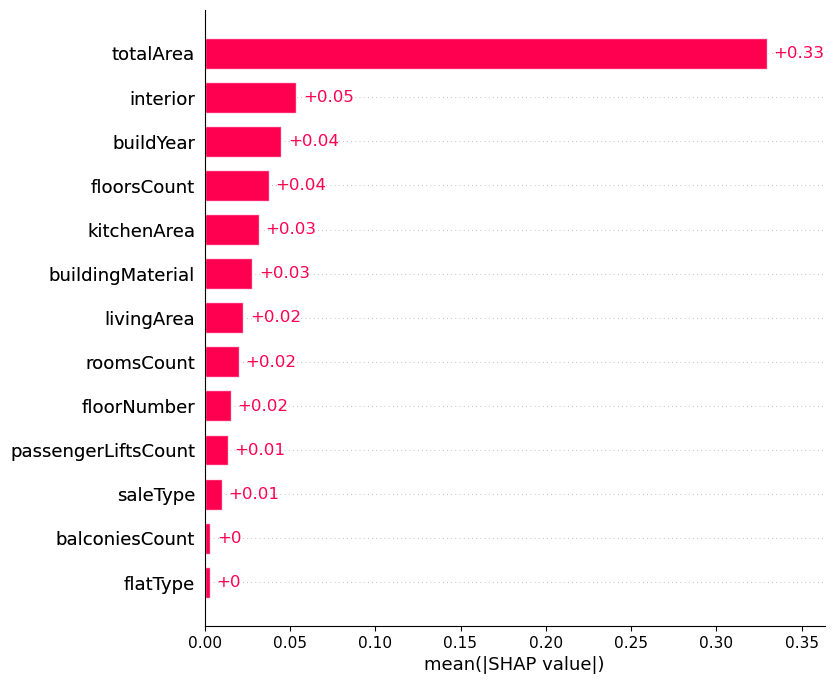

In [110]:
shap.plots.bar(shap_values_lgbm, max_display=68)

Text(0.5, 1.0, 'Feature Importance')

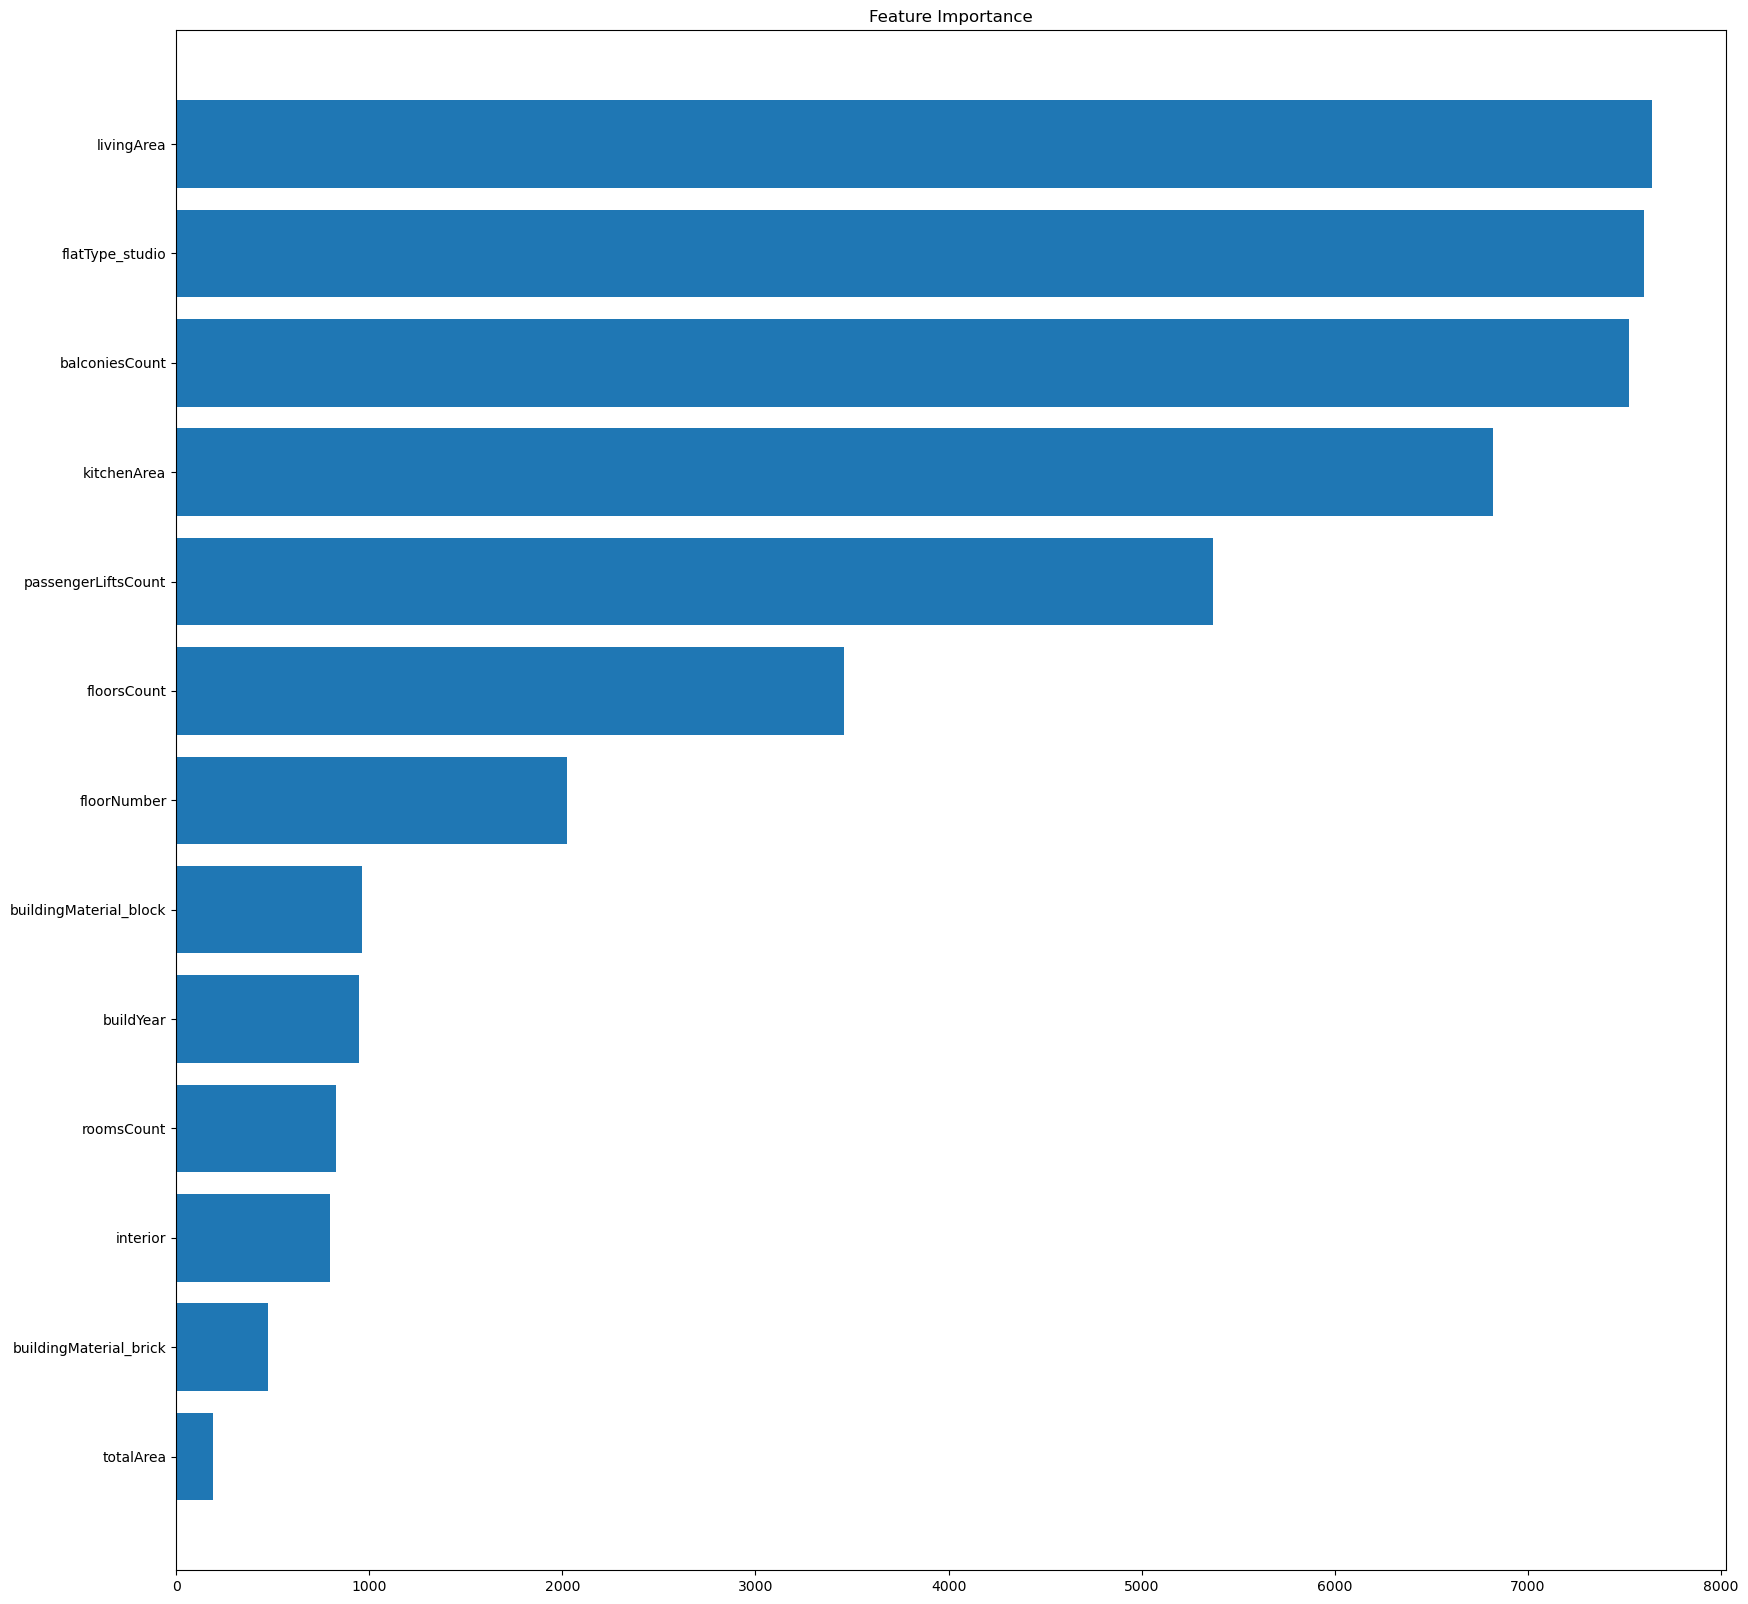

In [111]:
feature_importance = grid_lgbm.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_test.columns)[sorted_idx])
plt.title('Feature Importance')

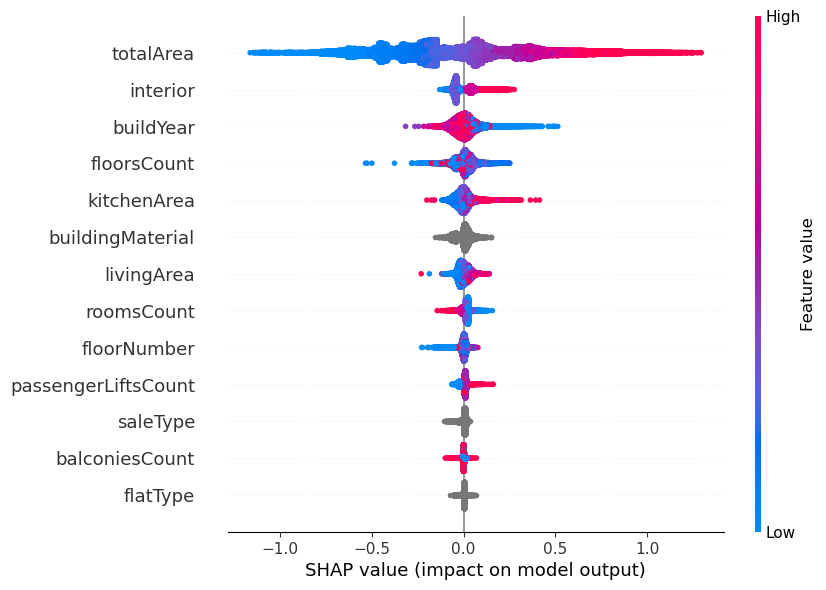

In [112]:
shap.plots.beeswarm(shap_values_lgbm, max_display=68)

### Линейная регрессия

Взглянем и на модель линейной регрессии. Здесь не получится перебирать какие-либо гиперпараметры, поэтому просто проводим кросс-валидацию.

In [113]:
linear = LinearRegression()

In [114]:
features_train_for_linear = features_train.copy()
features_train_for_linear

,roomsCount,totalArea,livingArea,kitchenArea,balconiesCount,interior,floorNumber,floorsCount,passengerLiftsCount,buildYear,...,buildingMaterial_block,buildingMaterial_brick,buildingMaterial_monolith,buildingMaterial_monolithBrick,buildingMaterial_old,buildingMaterial_panel,buildingMaterial_stalin,buildingMaterial_wireframe,buildingMaterial_wood,saleType_free
6001,-0.5,-0.616883,-0.549107,-0.448276,0.0,0.0,0.000000,-0.090909,0.0,-0.532020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30693,-0.5,-0.690584,-0.473214,-0.775862,-1.0,-1.0,0.666667,1.272727,2.0,0.315271,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20649,-0.5,-0.636364,-0.571429,-0.517241,-1.0,1.0,-0.500000,-0.090909,0.0,-0.532020,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
26519,0.5,1.360390,1.325893,0.586207,0.0,1.0,0.333333,0.000000,0.0,0.019704,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3736,0.0,0.275974,0.620536,-0.086207,-1.0,2.0,-0.333333,-0.454545,-1.0,-2.128079,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,-0.5,-0.545455,-0.459821,-0.586207,-1.0,0.0,0.666667,-0.090909,0.0,-0.453202,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19892,-0.5,-0.545455,-0.584821,-0.086207,0.0,1.0,2.666667,1.363636,1.0,0.295567,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2177,0.5,0.915584,0.522321,2.672414,0.0,2.0,-0.166667,0.545455,0.0,0.295567,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11760,0.5,0.461039,0.575893,0.086207,0.0,0.0,-0.333333,-0.090909,0.0,-0.433498,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
scores = cross_validate(linear, features_train, target_train, cv=5, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'])

In [116]:
scores

{'fit_time': array([0.73460102, 0.01200962, 0.01100969, 0.01100993, 0.01101971]),
 'score_time': array([0.01702547, 0.00300288, 0.00300312, 0.00300241, 0.00199366]),
 'test_neg_root_mean_squared_error': array([-0.2735095 , -0.27090943, -0.27367037, -0.28095488, -0.27348017]),
 'test_neg_mean_absolute_error': array([-0.20517825, -0.20369674, -0.20645764, -0.20194981, -0.20647748])}

In [117]:
rmse_linear = abs(round(scores['test_neg_root_mean_squared_error'].mean(), 3))
print('RMSE при линейной регрессии на кросс-валидации:', rmse_linear)

RMSE при линейной регрессии на кросс-валидации: 0.275


In [118]:
mae_linear = abs(round(scores['test_neg_mean_absolute_error'].mean(), 3))
print('MAE при линейной регрессии на кросс-валидации:', mae_linear)

MAE при линейной регрессии на кросс-валидации: 0.205


### Итоги обучения

Подведем итог результатов таблицей.

In [119]:
comparison_table = pd.DataFrame({'Название модели': ['CatBoost', 'LGBM', 'Linear'], \
                                 'RMSE при валидации': [rmse_cat, rmse_lgbm, rmse_linear],\
                                 'MAE при валидации': [mae_cat, mae_lgbm, mae_linear]})
comparison_table

,Название модели,RMSE при валидации,MAE при валидации
0,CatBoost,0.207,0.158
1,LGBM,0.204,0.153
2,Linear,0.275,0.205


Можем видеть, что лучшие результаты получила модель LGBM, поэтому используем ее для тестовой проверки.

## Тестовая проверка

In [120]:
lgbm_best_model = grid_lgbm.best_estimator_
lgbm_best_model

LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=1500,
              objective='regression', random_state=12345)

Необходимо применить метод np.exp, чтобы вывести предсказания из логарифмического преобразования в нормальный вид.

In [121]:
lgbm_preds = np.exp(lgbm_best_model.predict(features_test_for_lgbm))
lgbm_preds

array([17452.30129425,  9337.78572625, 16196.14690453, ...,
        4246.95794012,  7370.9227377 ,  6798.1117073 ])

In [122]:
target_test = np.exp(target_test)
target_test

1771     14800.0
31820     6850.0
26485    15000.0
6661      6000.0
33447     8990.0
          ...   
37414    24500.0
30156     5349.0
18654     5300.0
9168      6900.0
22874     7780.0
Name: price, Length: 9456, dtype: float64

Произведем финальную оценку.

In [123]:
test_rmse_lgbm = mean_squared_error(target_test, lgbm_preds, squared=False)
print('RMSE при LGBM на тестовой выборке:', round(test_rmse_lgbm, 3))

RMSE при LGBM на тестовой выборке: 2871.975


In [124]:
test_mae_lgbm = mean_absolute_error(target_test, lgbm_preds)
print('MAE при LGBM на тестовой выборке:', round(test_mae_lgbm, 3))

MAE при LGBM на тестовой выборке: 1755.721
